In [26]:
import openpyxl
import pandas as pd
dataset=pd.read_excel("./PCOS_data_without_infertility.xlsx",sheet_name=1)


In [27]:
print(pd.isnull(dataset).sum())



Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [28]:

count=0
for i in dataset['PCOS (Y/N)']:
    if i==1:
        count+=1
print("the number of pcos affected person", +count)


age=[]
freq=[]
dd=list(dataset['Weight (Kg)'])
for i in dataset['Weight (Kg)']:
    if i not in age:
        age.append(i)
        freq.append( dd.count(i))
print(age)
print(freq)



the number of pcos affected person 177
[44.6, 65.0, 68.8, 52.0, 74.1, 64.0, 58.5, 40.0, 71.0, 49.0, 74.0, 50.0, 57.3, 80.5, 43.0, 69.2, 52.4, 85.0, 64.2, 63.0, 42.0, 76.0, 68.0, 62.0, 56.0, 57.0, 58.0, 54.0, 73.0, 72.0, 53.0, 78.0, 33.0, 59.0, 75.0, 51.0, 67.0, 60.0, 55.0, 61.0, 70.0, 48.0, 108.0, 57.6, 43.7, 61.6, 69.5, 74.4, 45.0, 83.5, 62.5, 67.5, 91.4, 61.7, 62.2, 64.3, 68.6, 80.0, 71.2, 83.0, 79.0, 89.0, 53.4, 69.0, 56.4, 49.3, 53.2, 60.8, 46.0, 72.3, 59.6, 73.5, 88.0, 66.0, 66.3, 47.0, 47.8, 76.8, 31.0, 74.3, 58.1, 53.6, 104.0, 63.8, 62.7, 32.0, 35.0, 34.0, 53.5, 64.4, 58.9, 55.1, 55.7, 65.7, 36.0, 55.5, 82.0, 80.4, 77.9, 60.5, 76.9, 65.6, 38.0, 54.7, 71.8, 45.6, 71.5, 44.0, 61.8, 94.0, 66.1, 87.9, 44.8, 49.1, 52.9, 54.3, 63.2]
[1, 25, 1, 27, 3, 17, 1, 10, 8, 3, 5, 34, 1, 1, 3, 1, 1, 5, 1, 16, 5, 4, 15, 15, 22, 12, 13, 19, 3, 7, 12, 5, 2, 12, 4, 7, 7, 36, 20, 15, 10, 12, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 4, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1

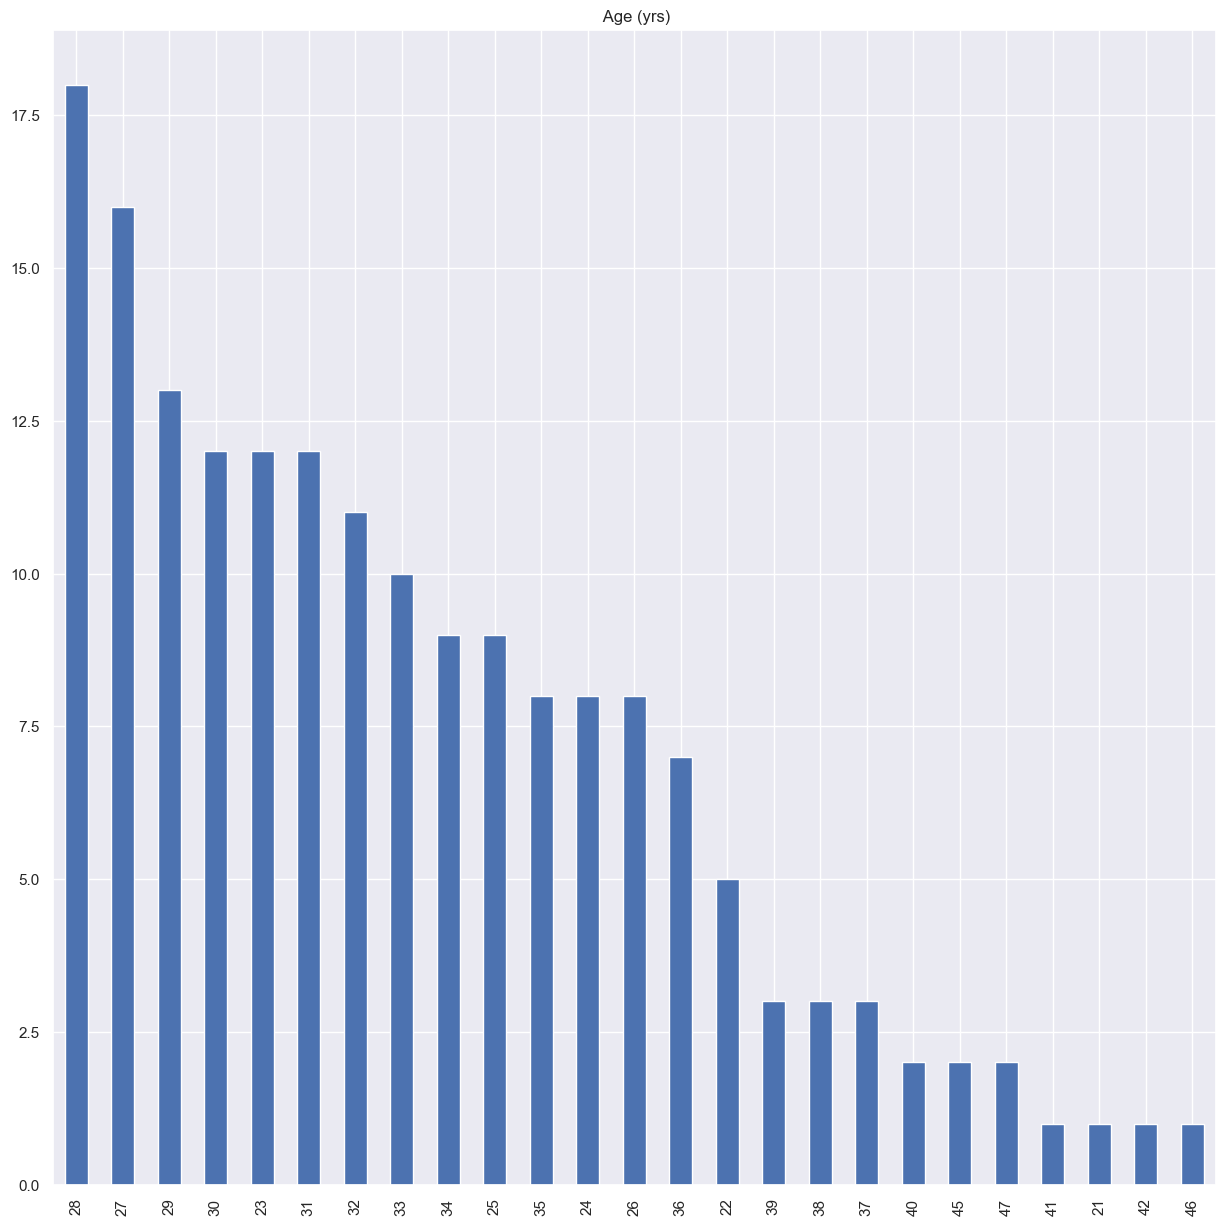

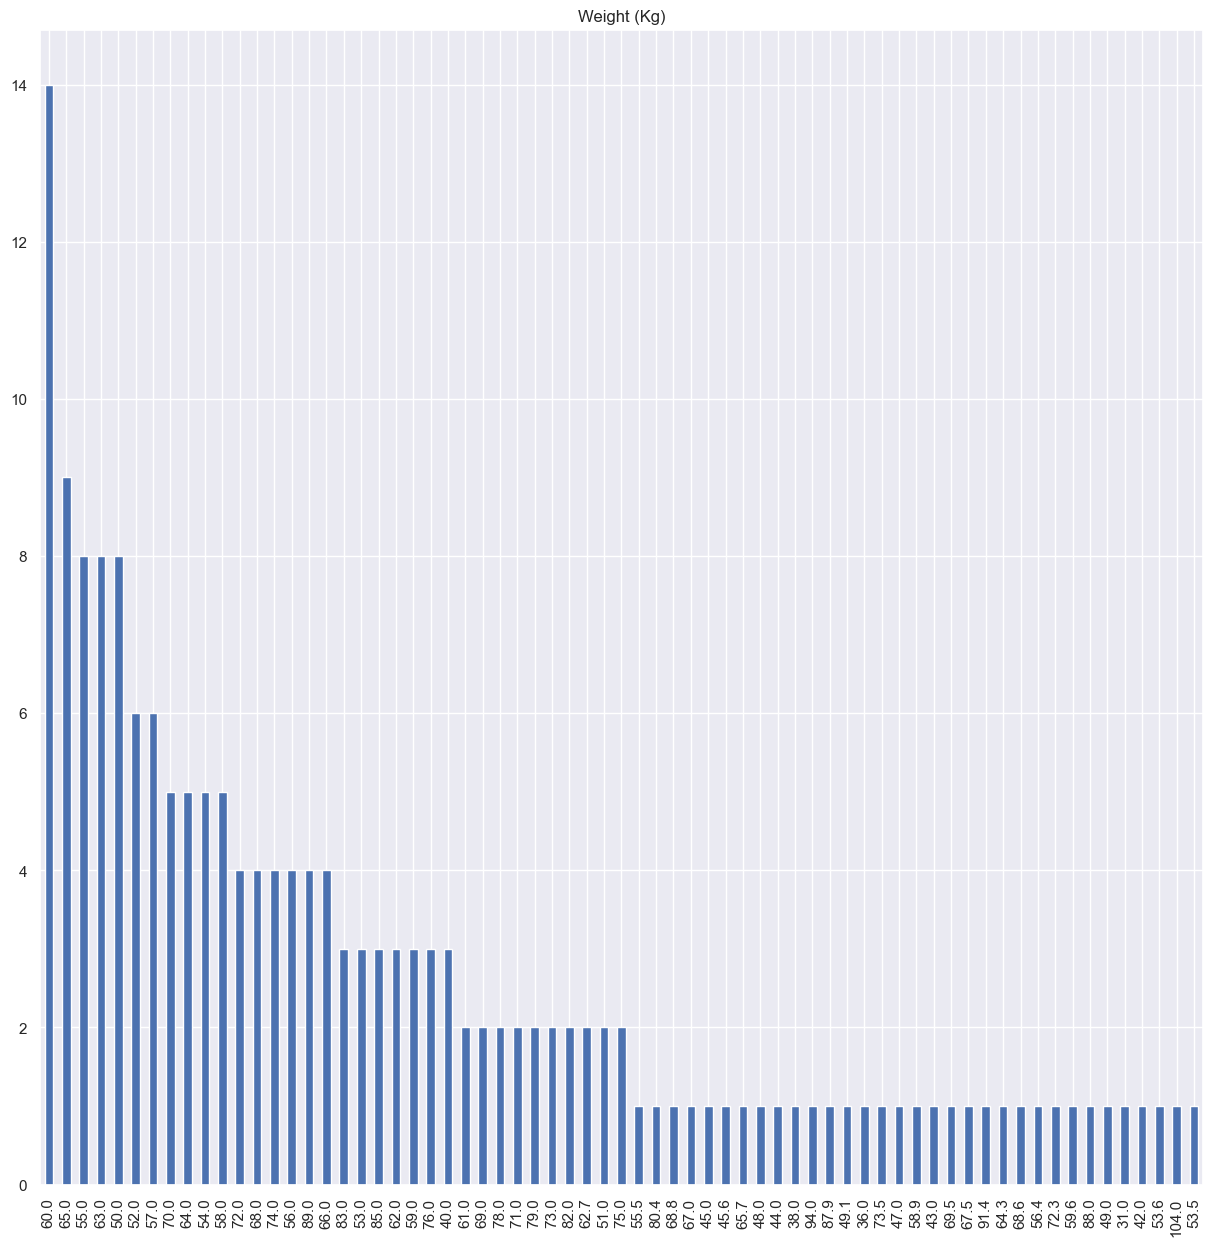

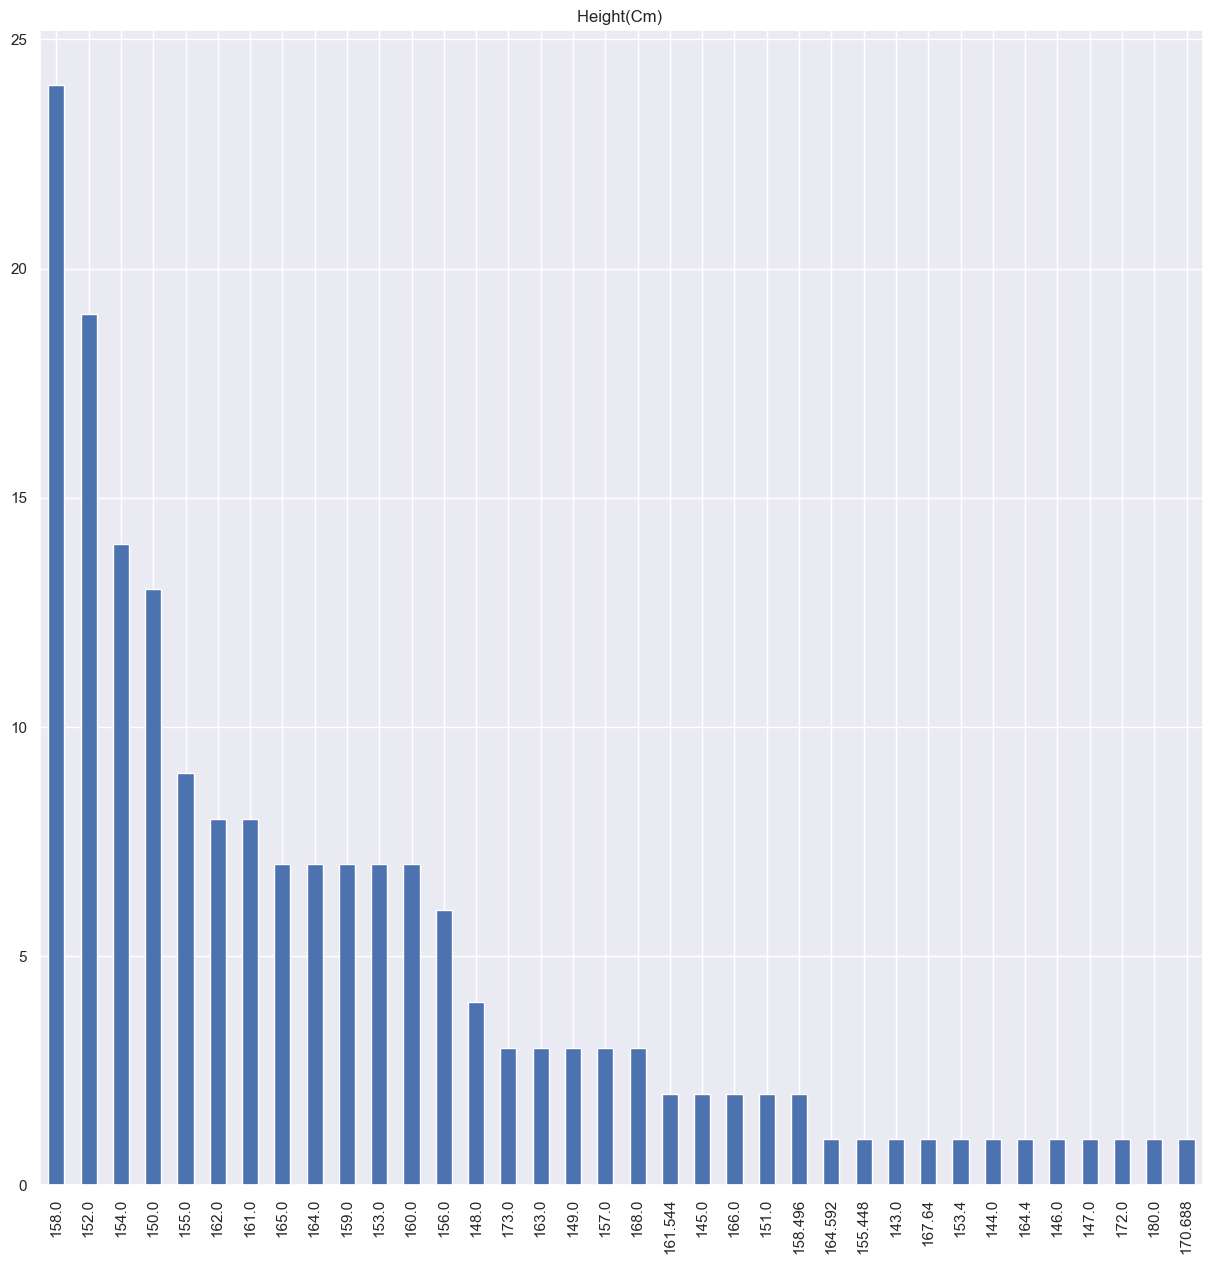

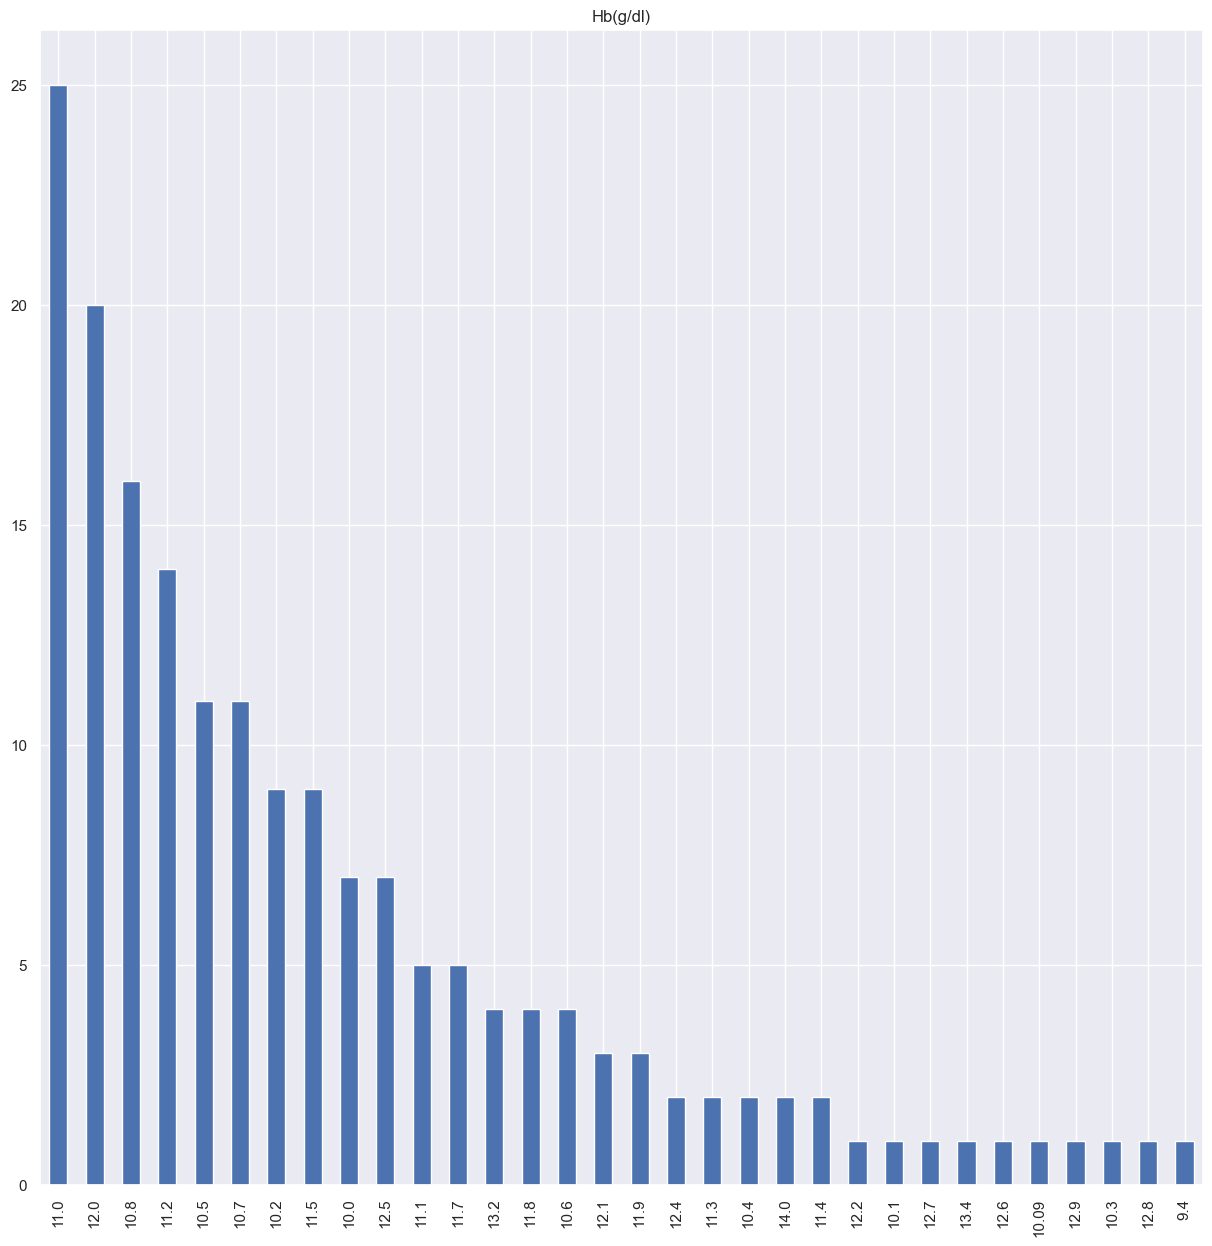

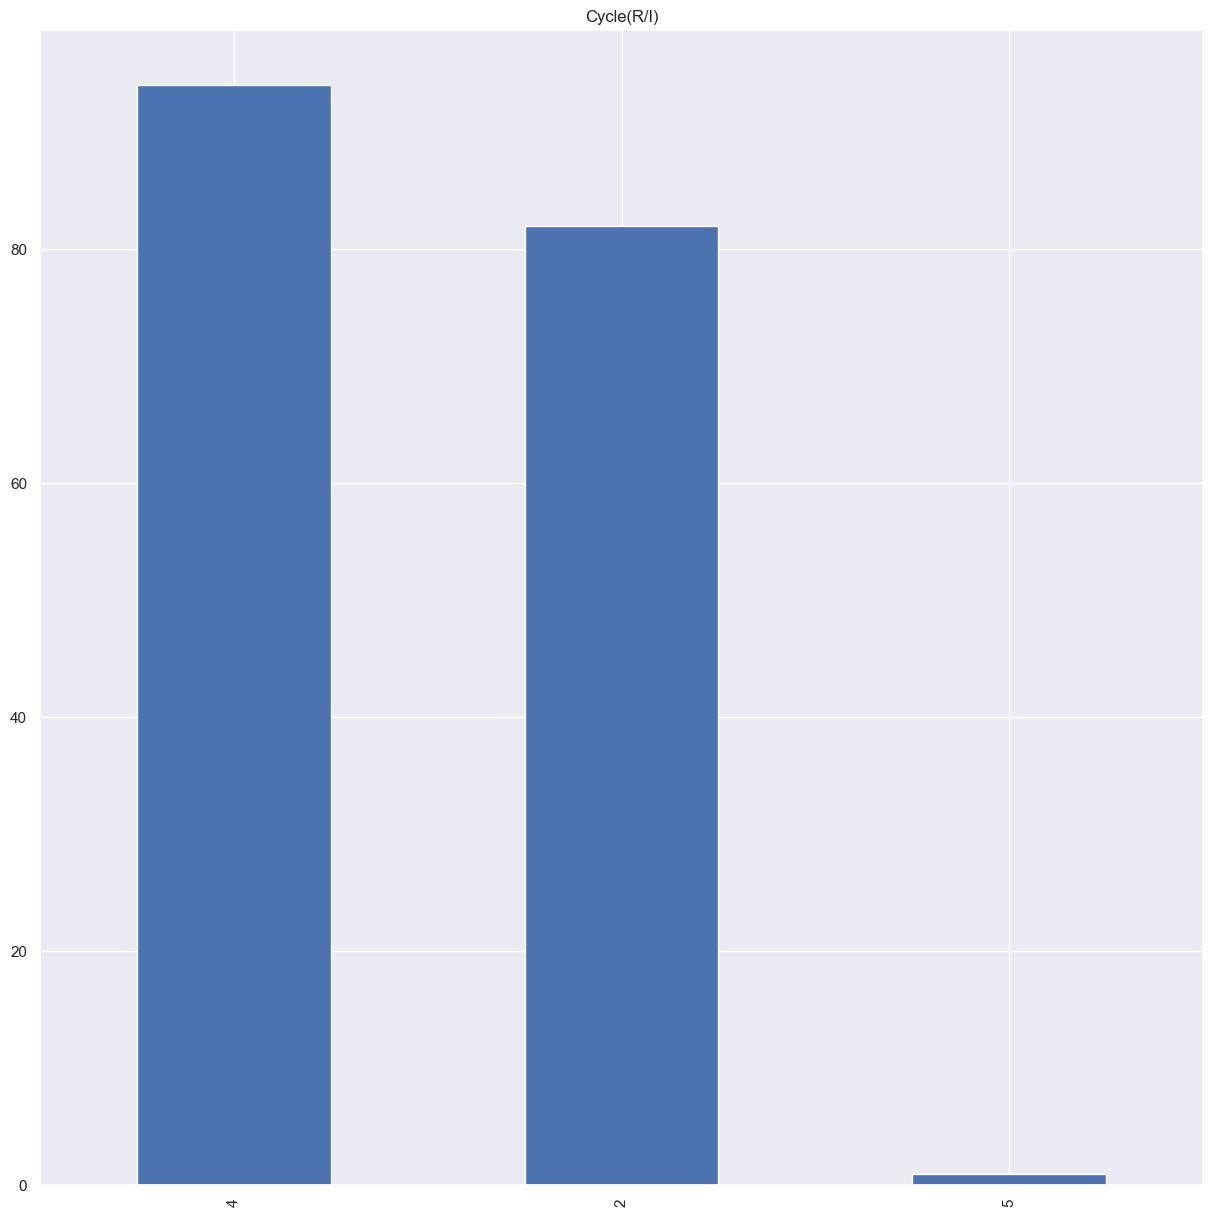

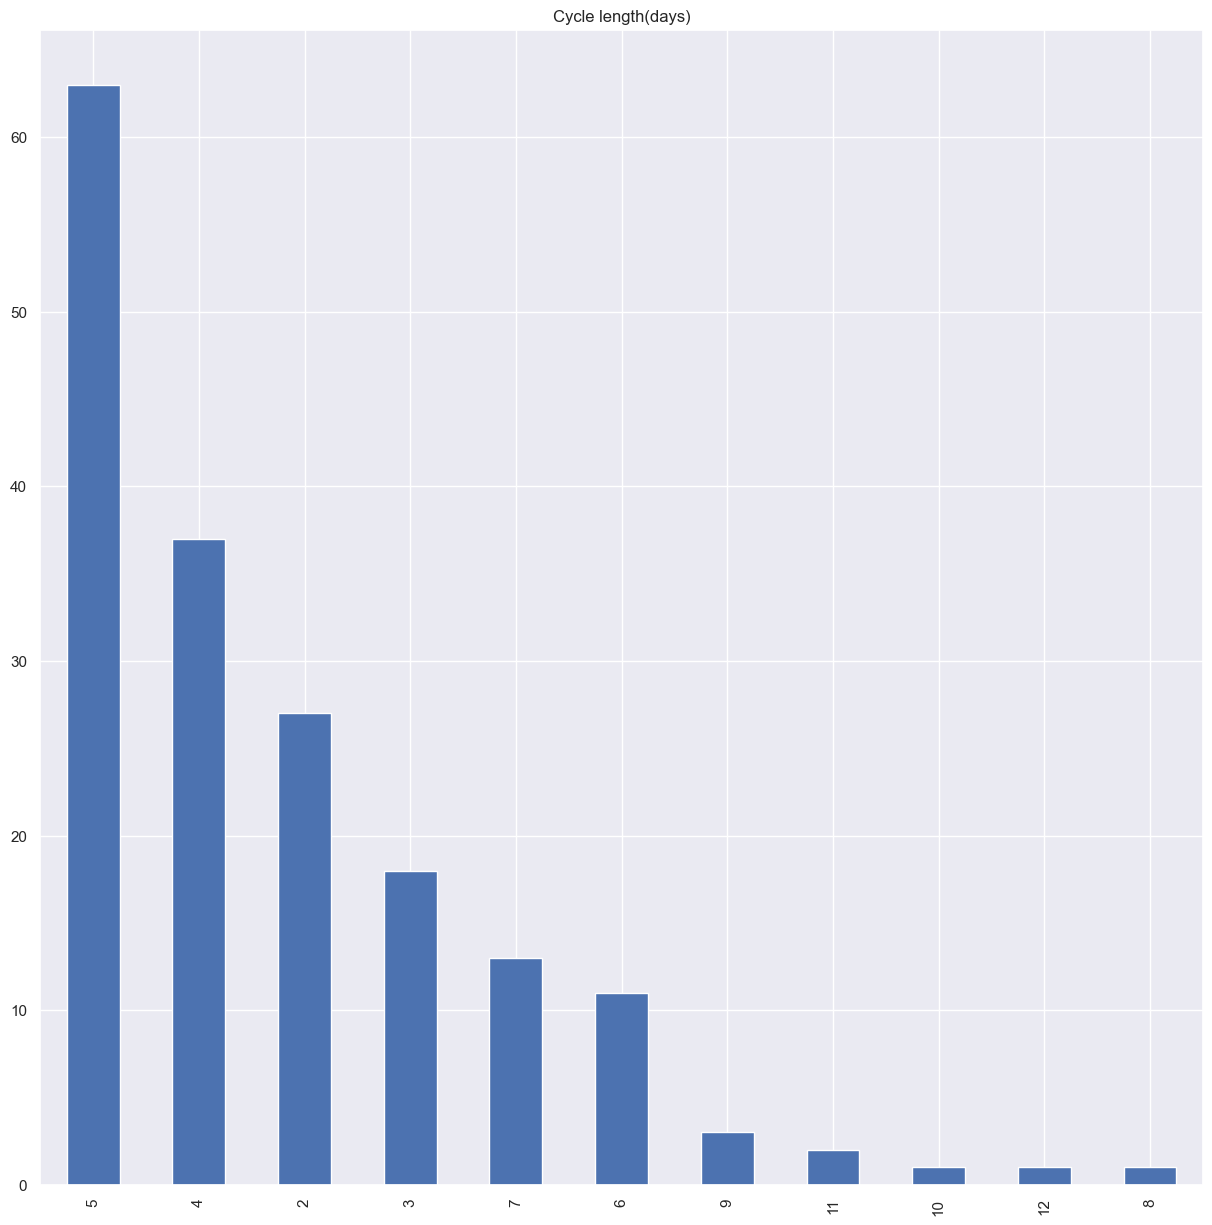

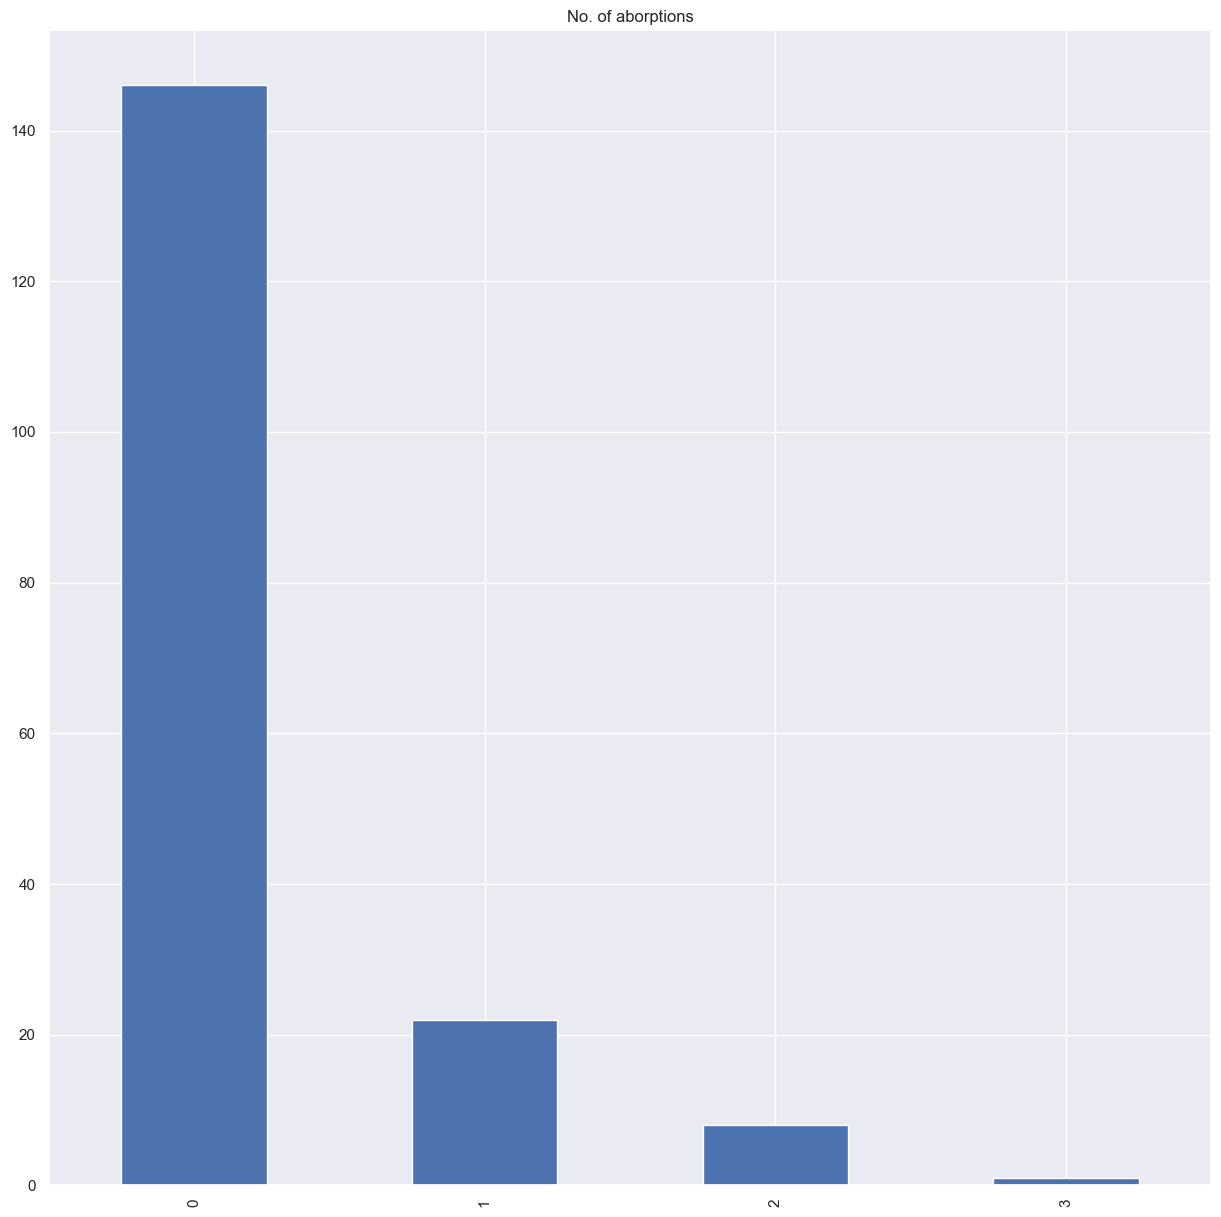

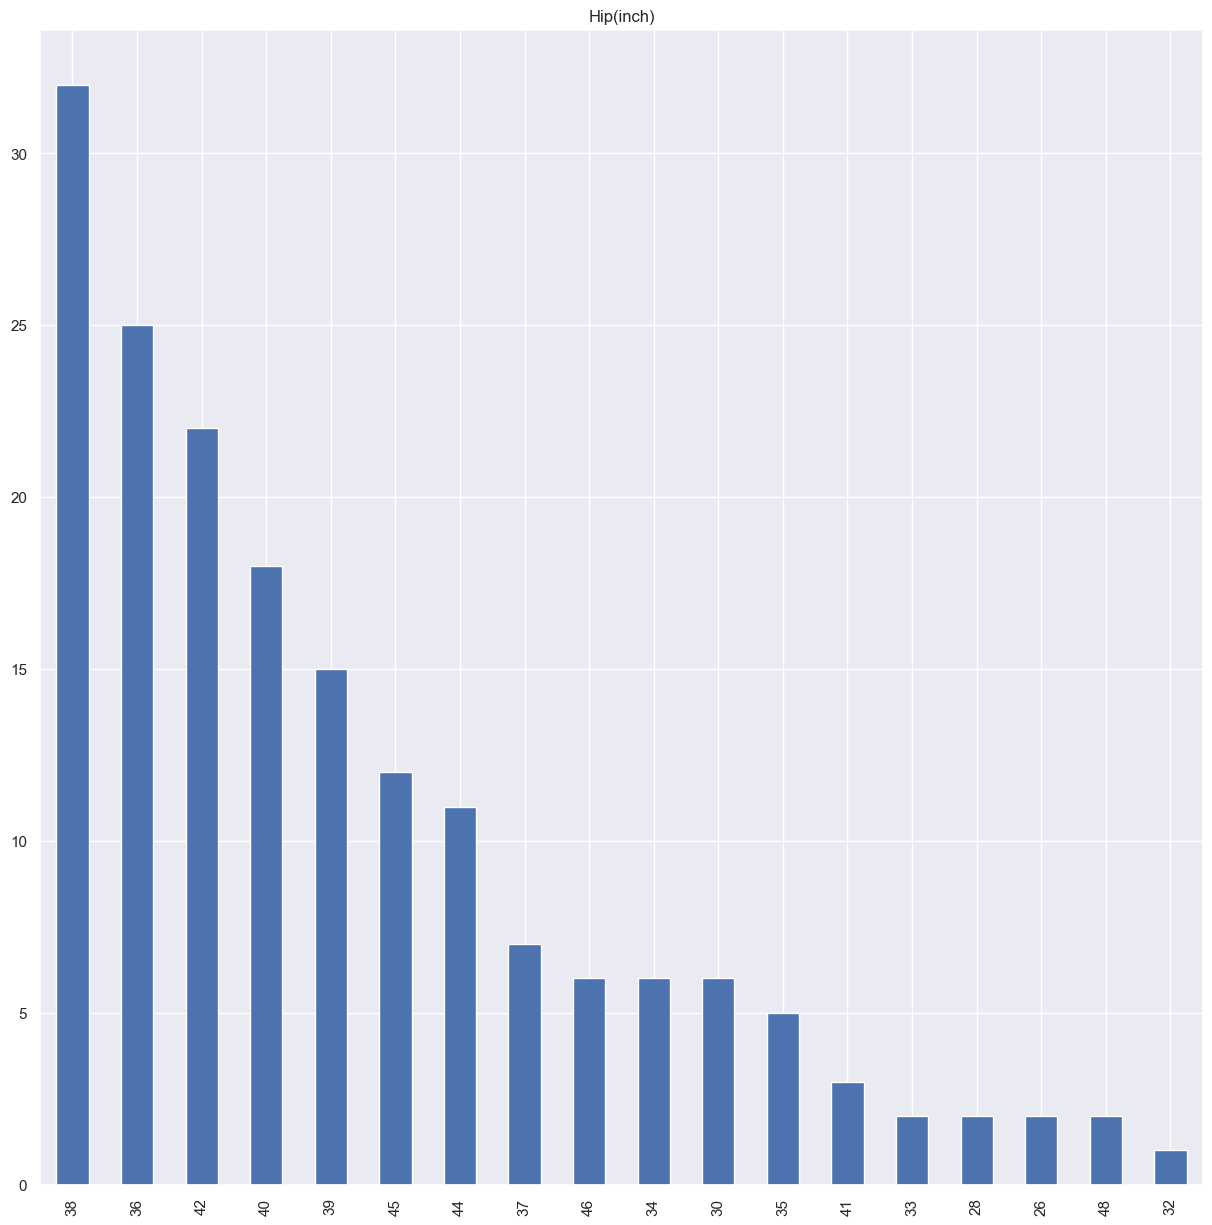

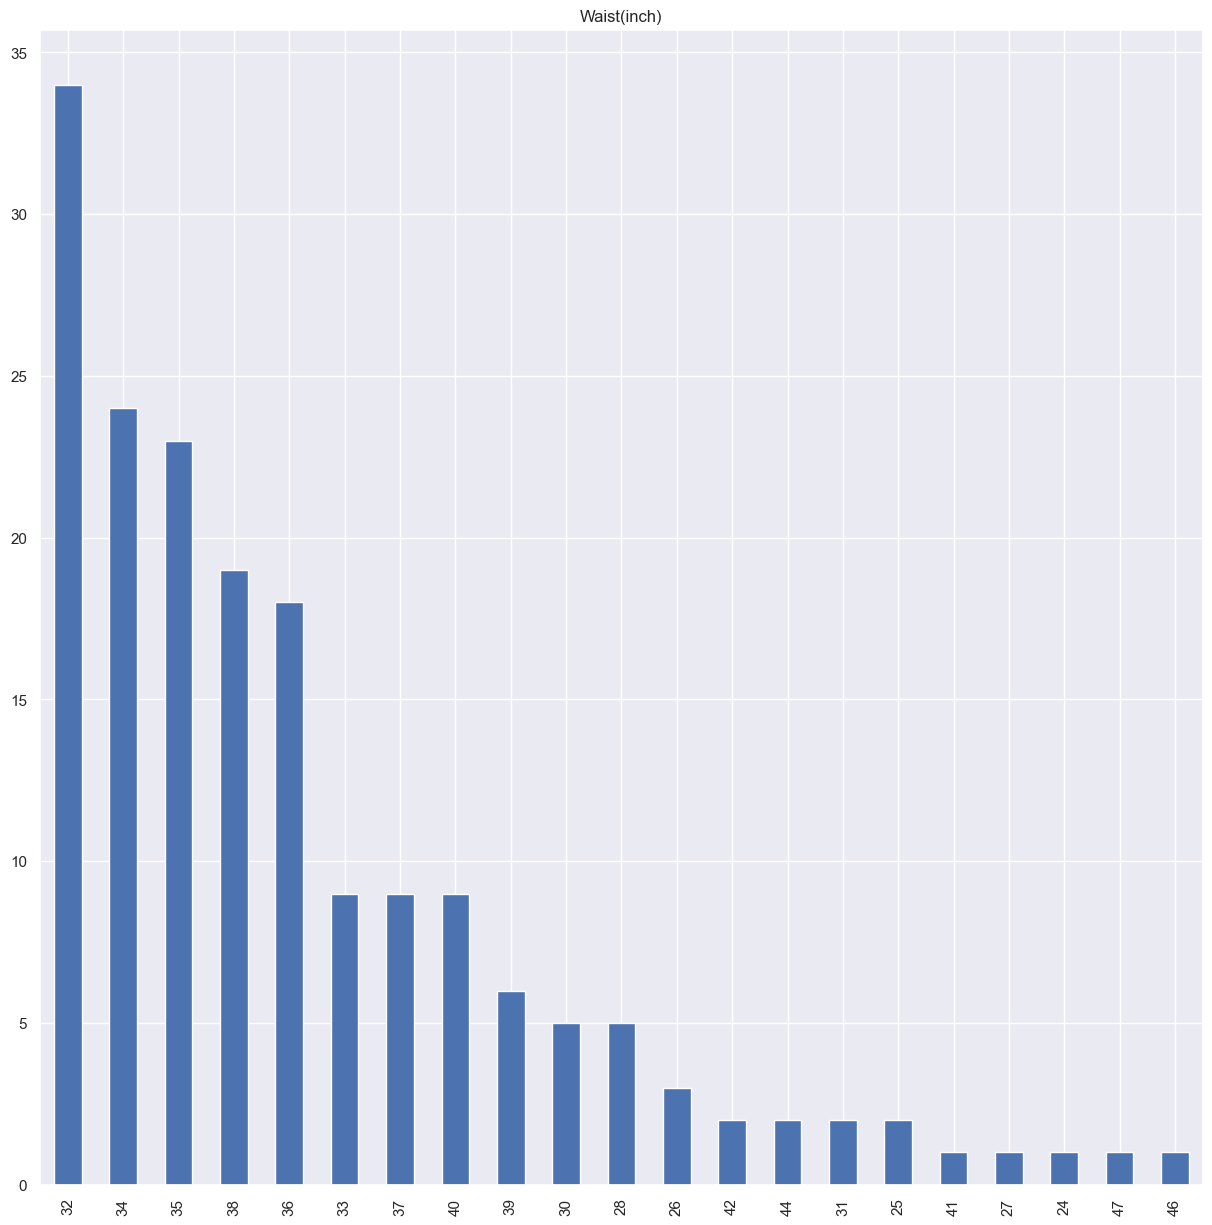

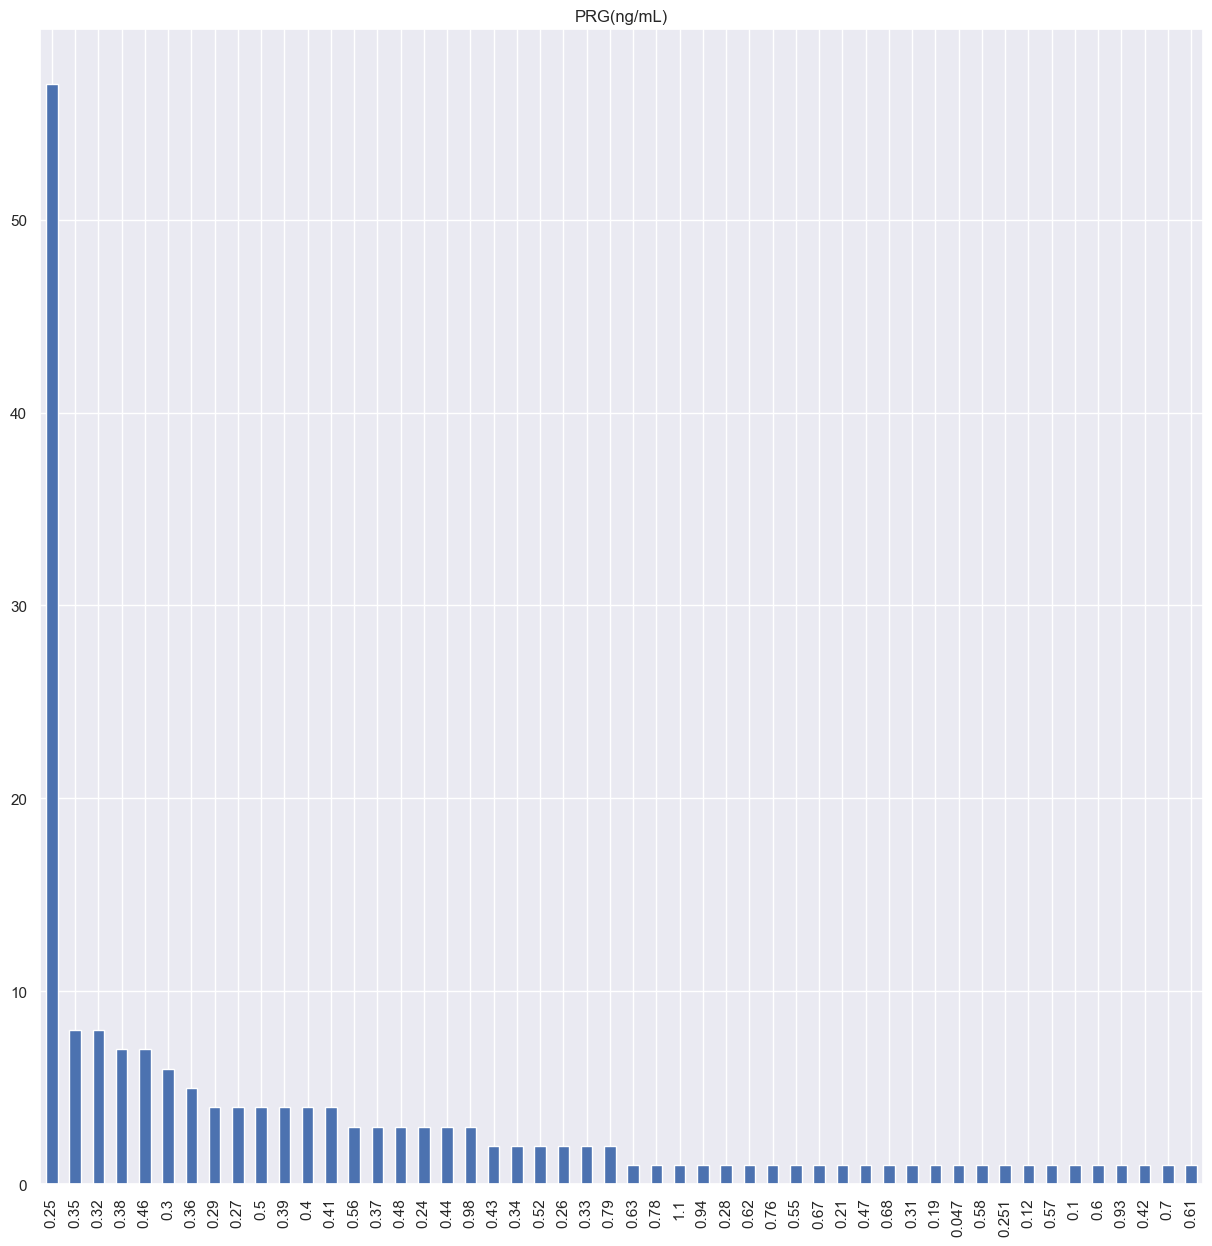

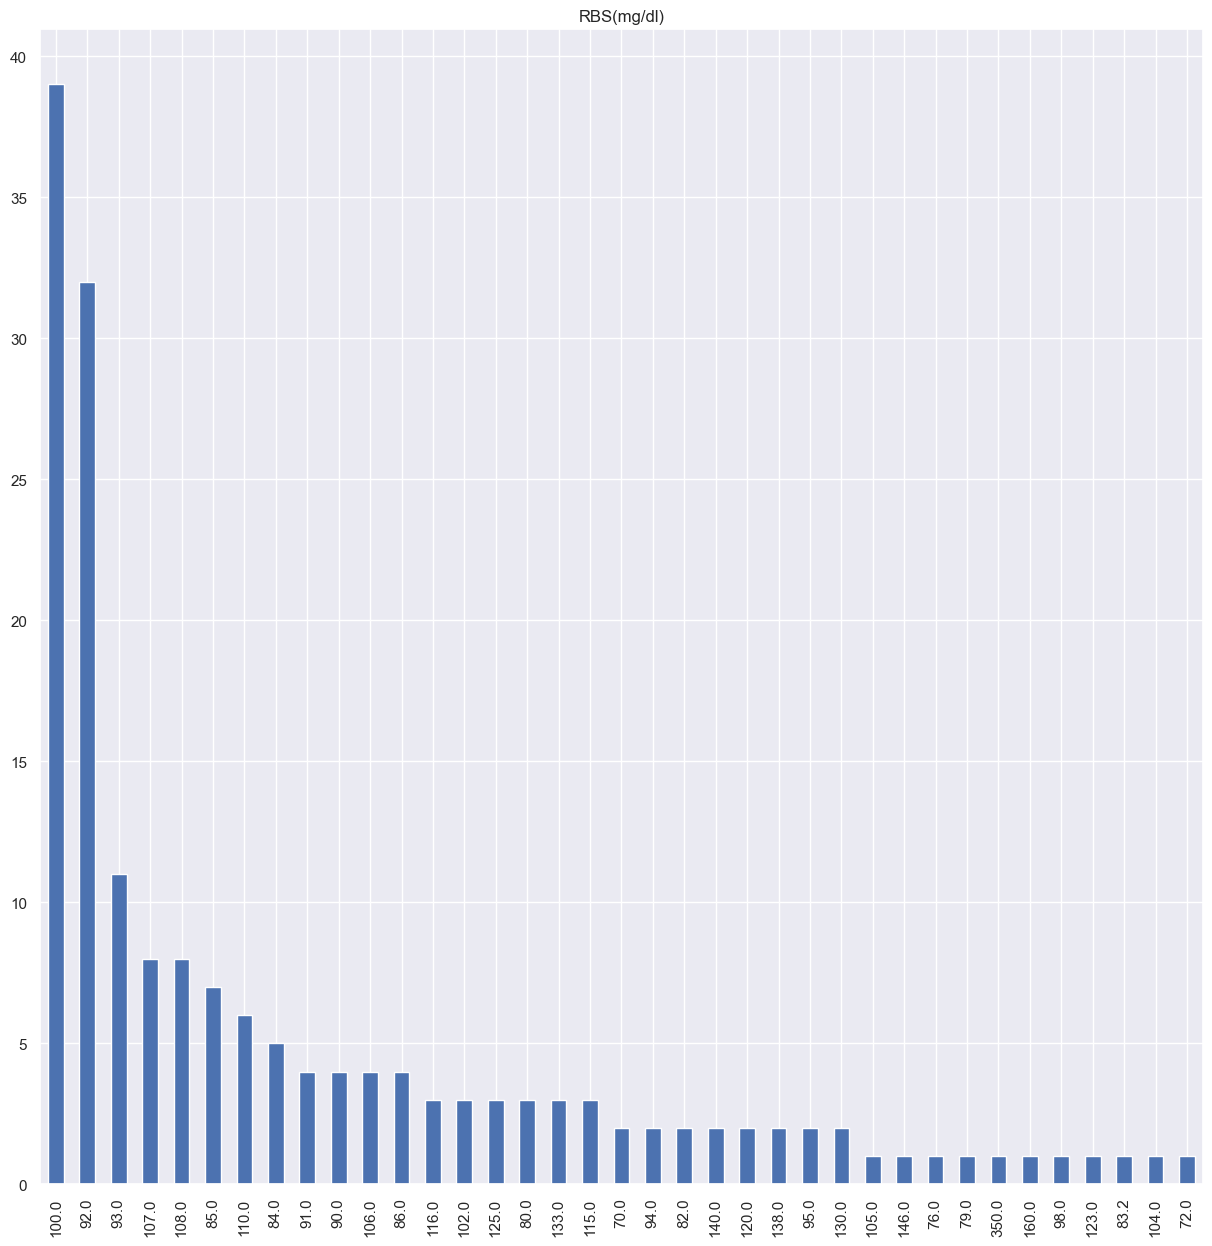

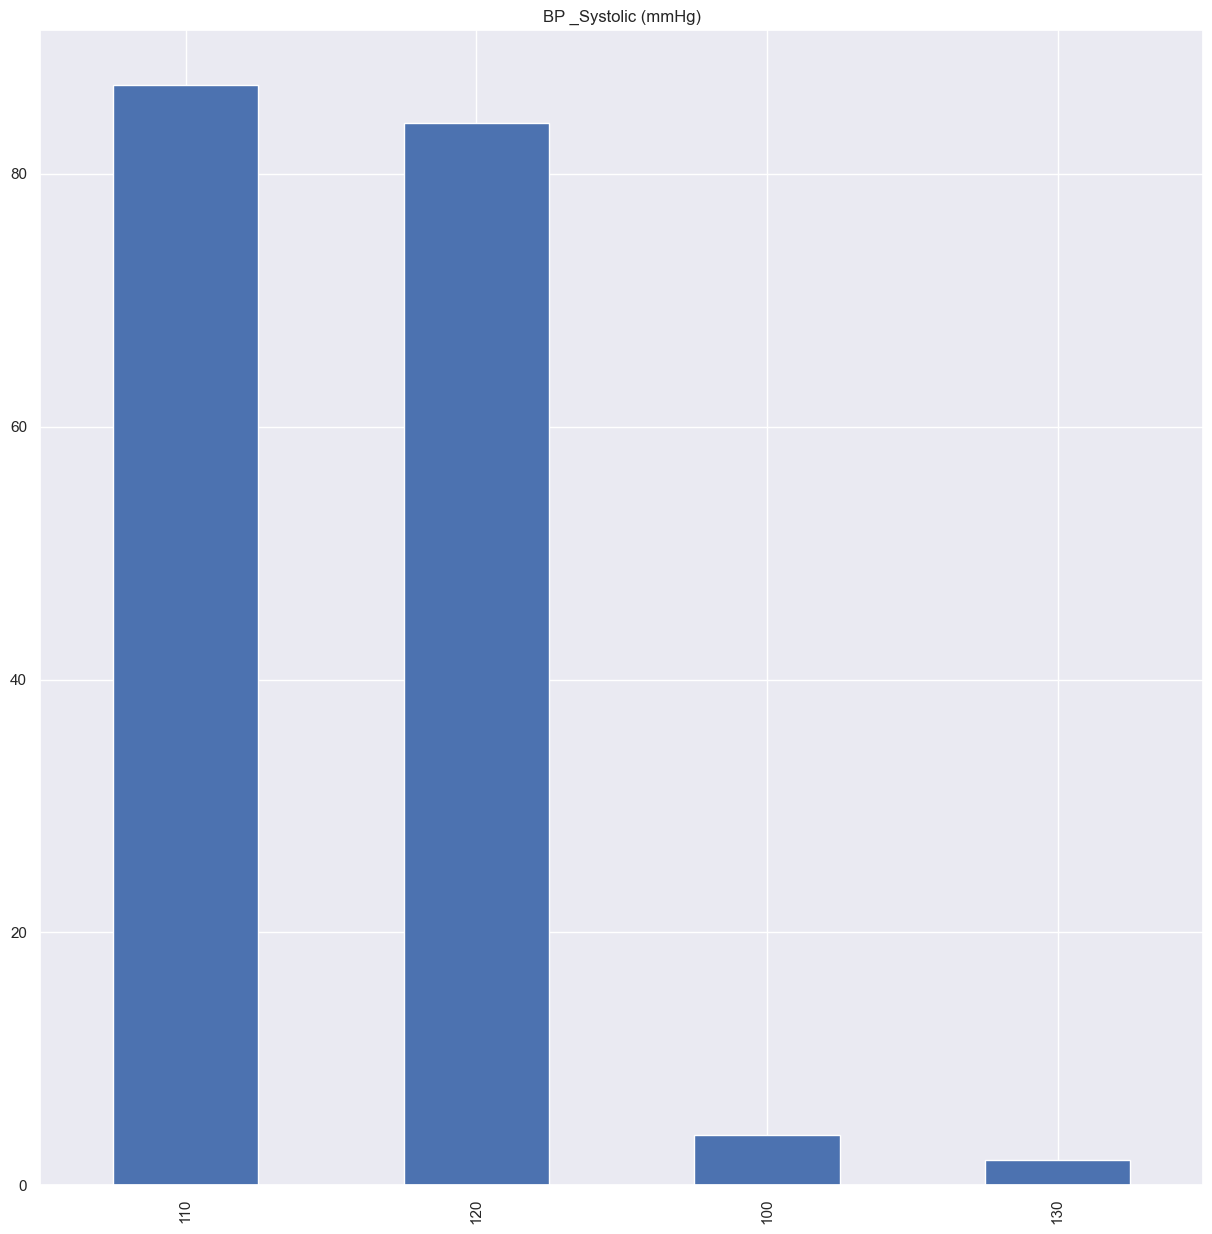

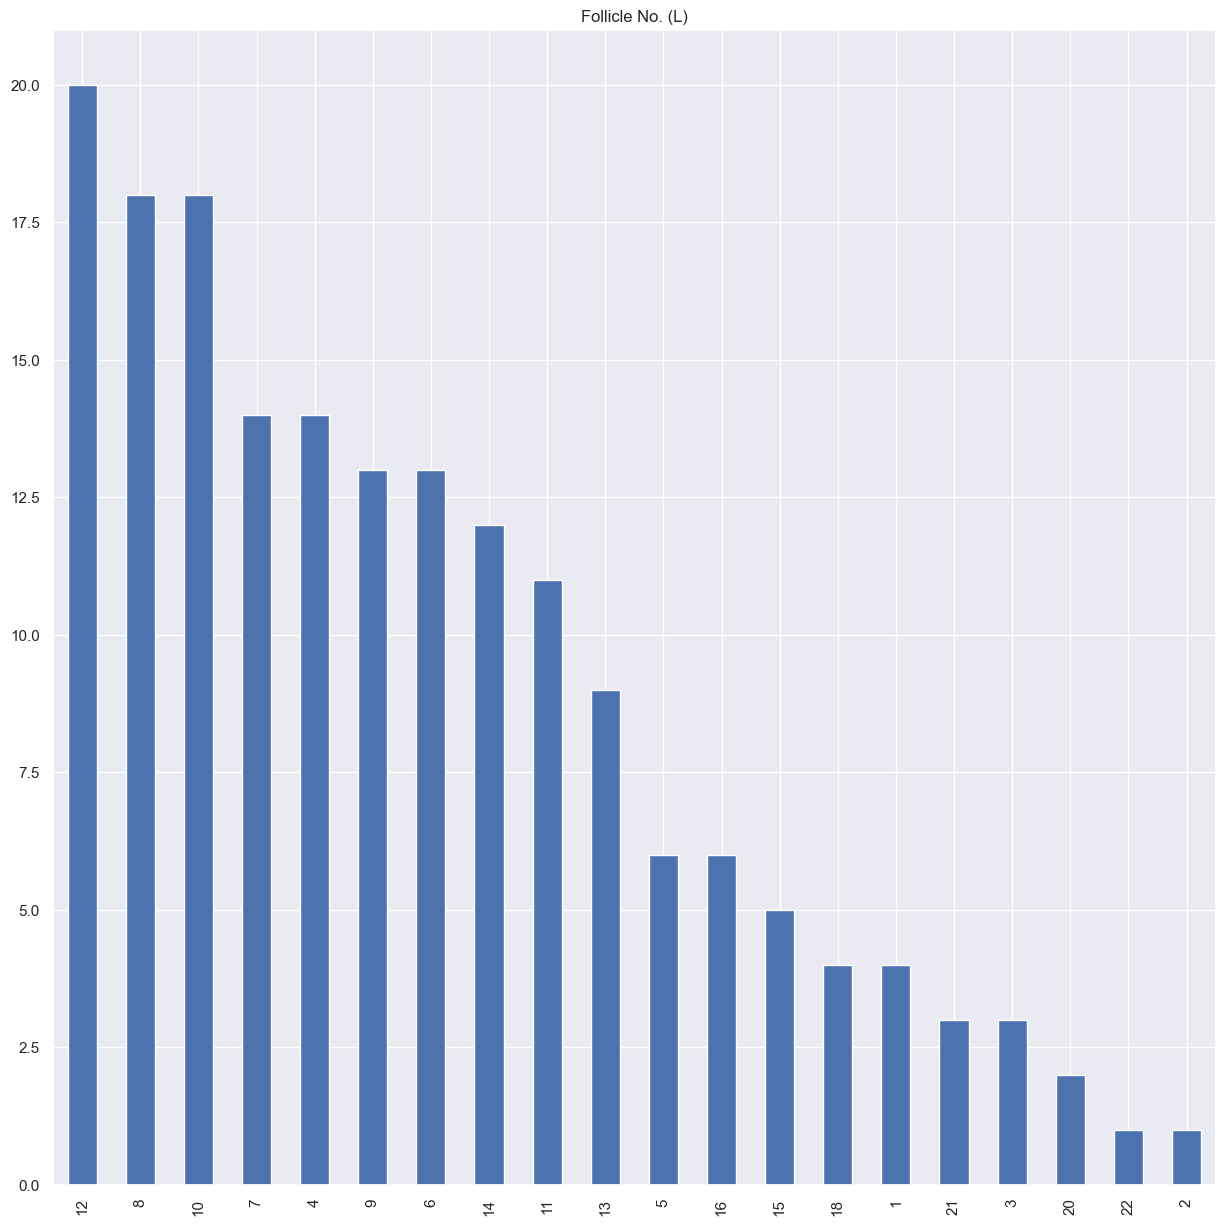

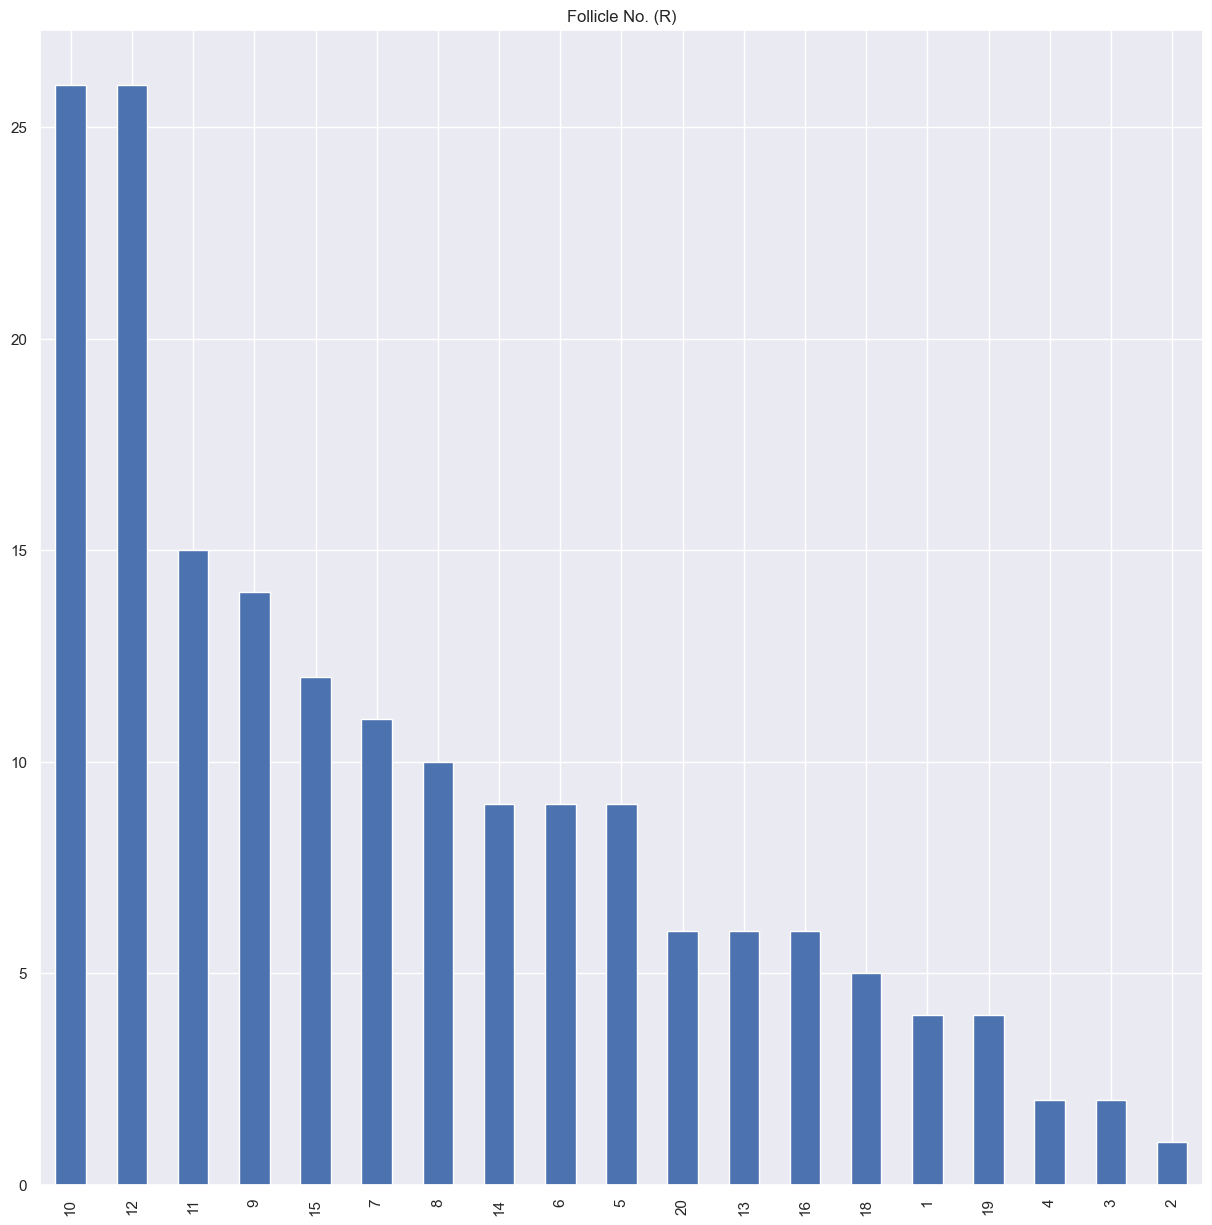

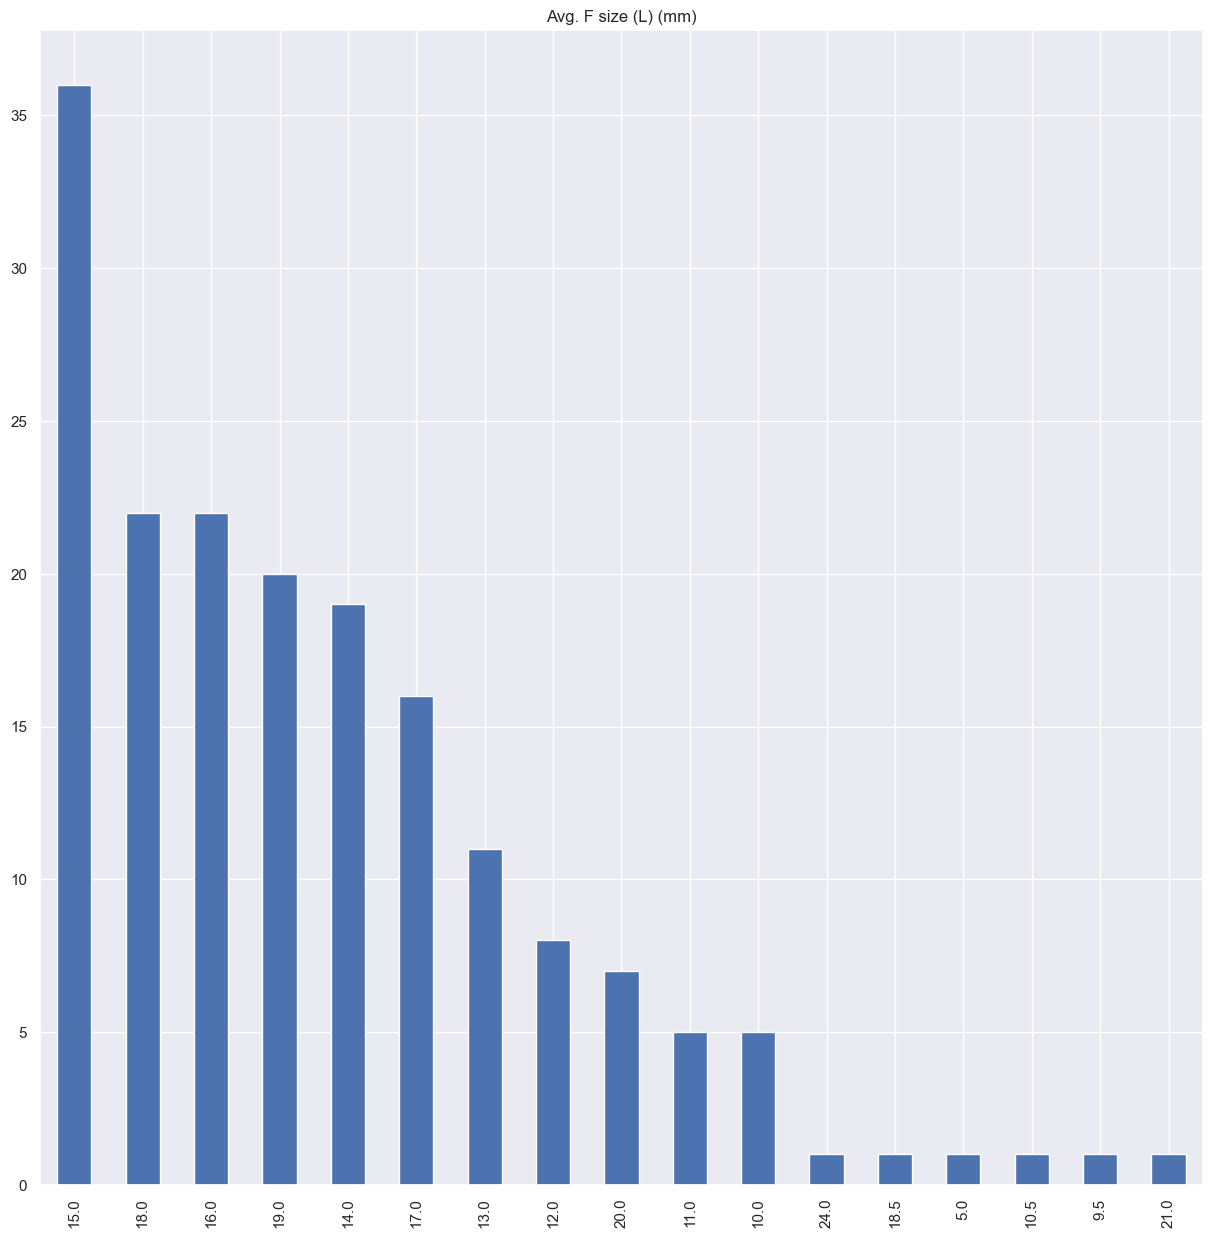

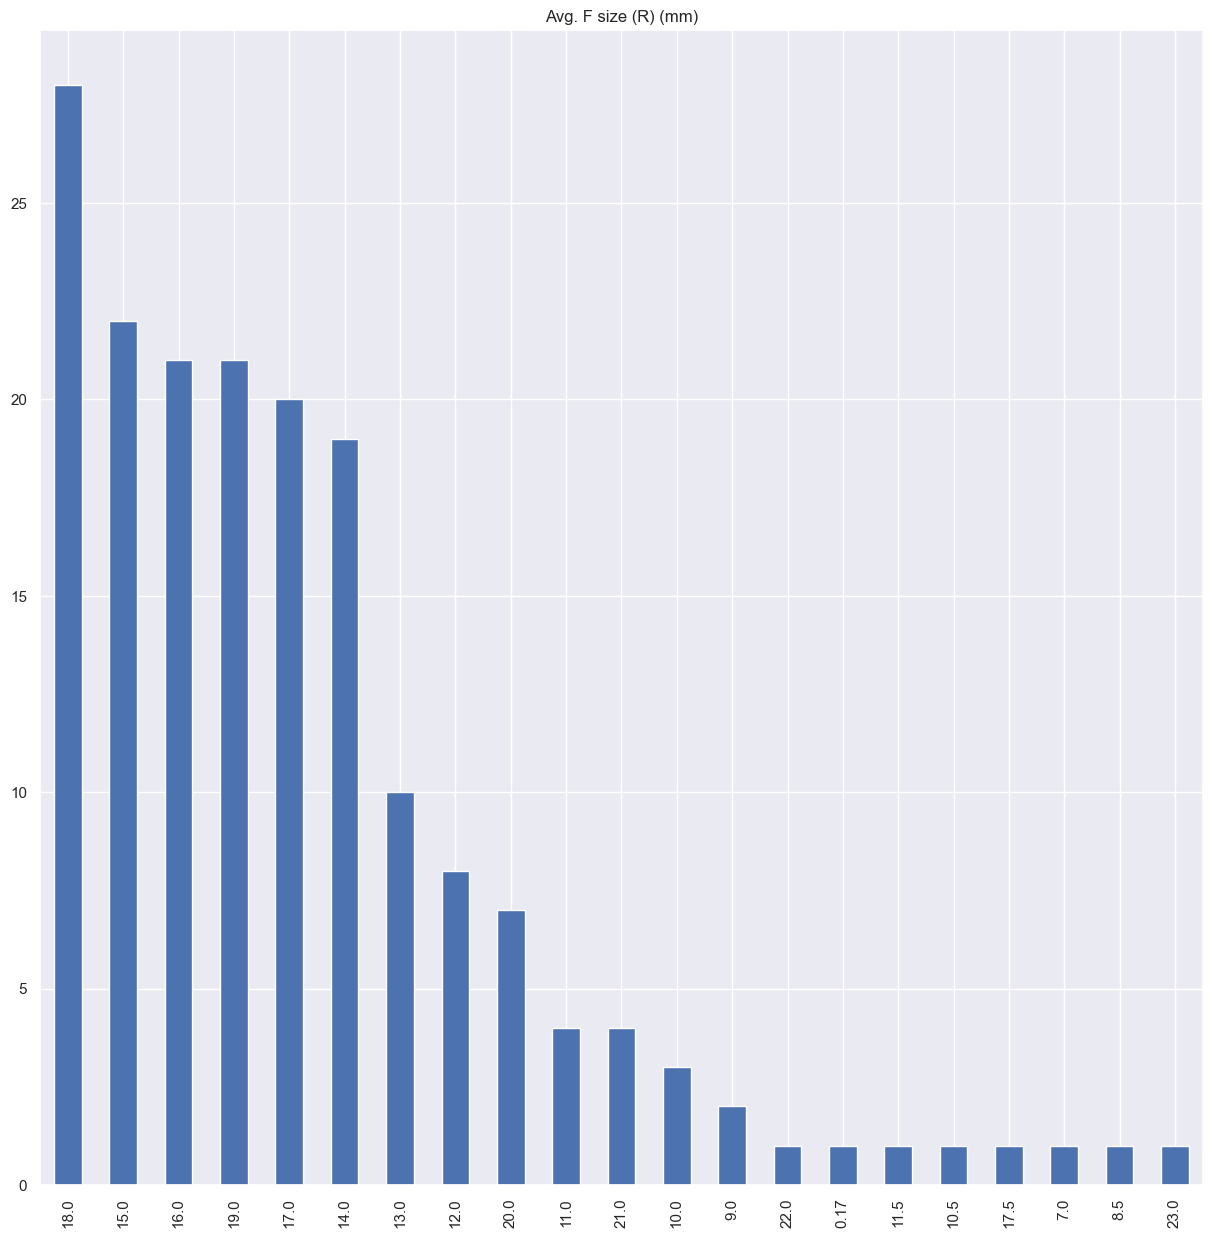

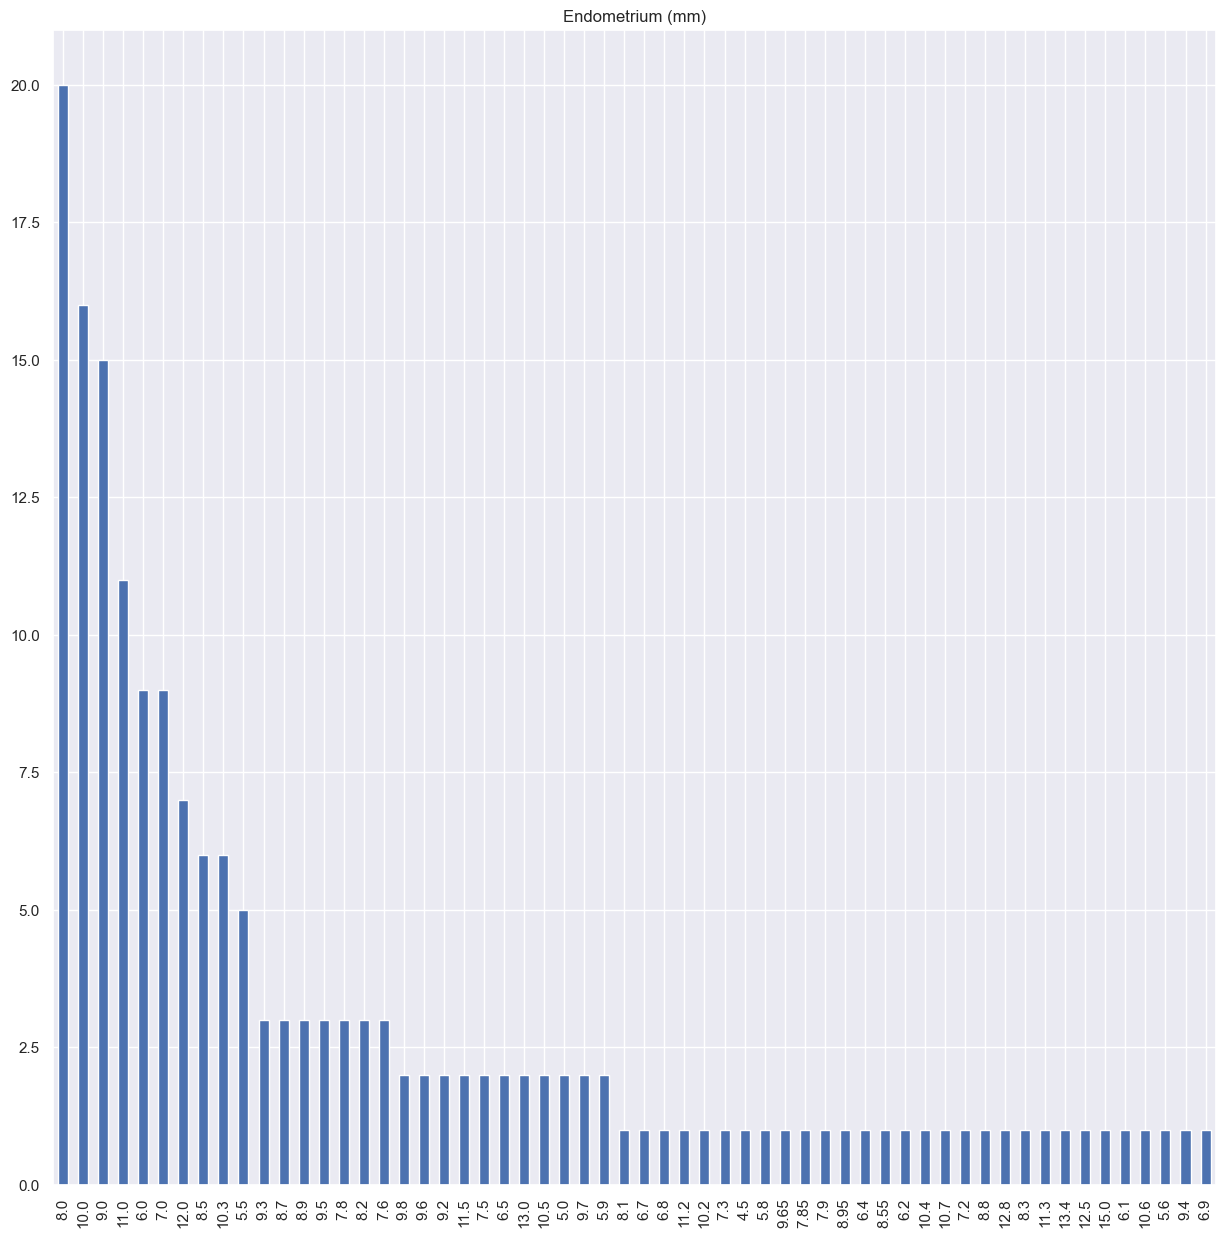

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  dataset[dataset['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

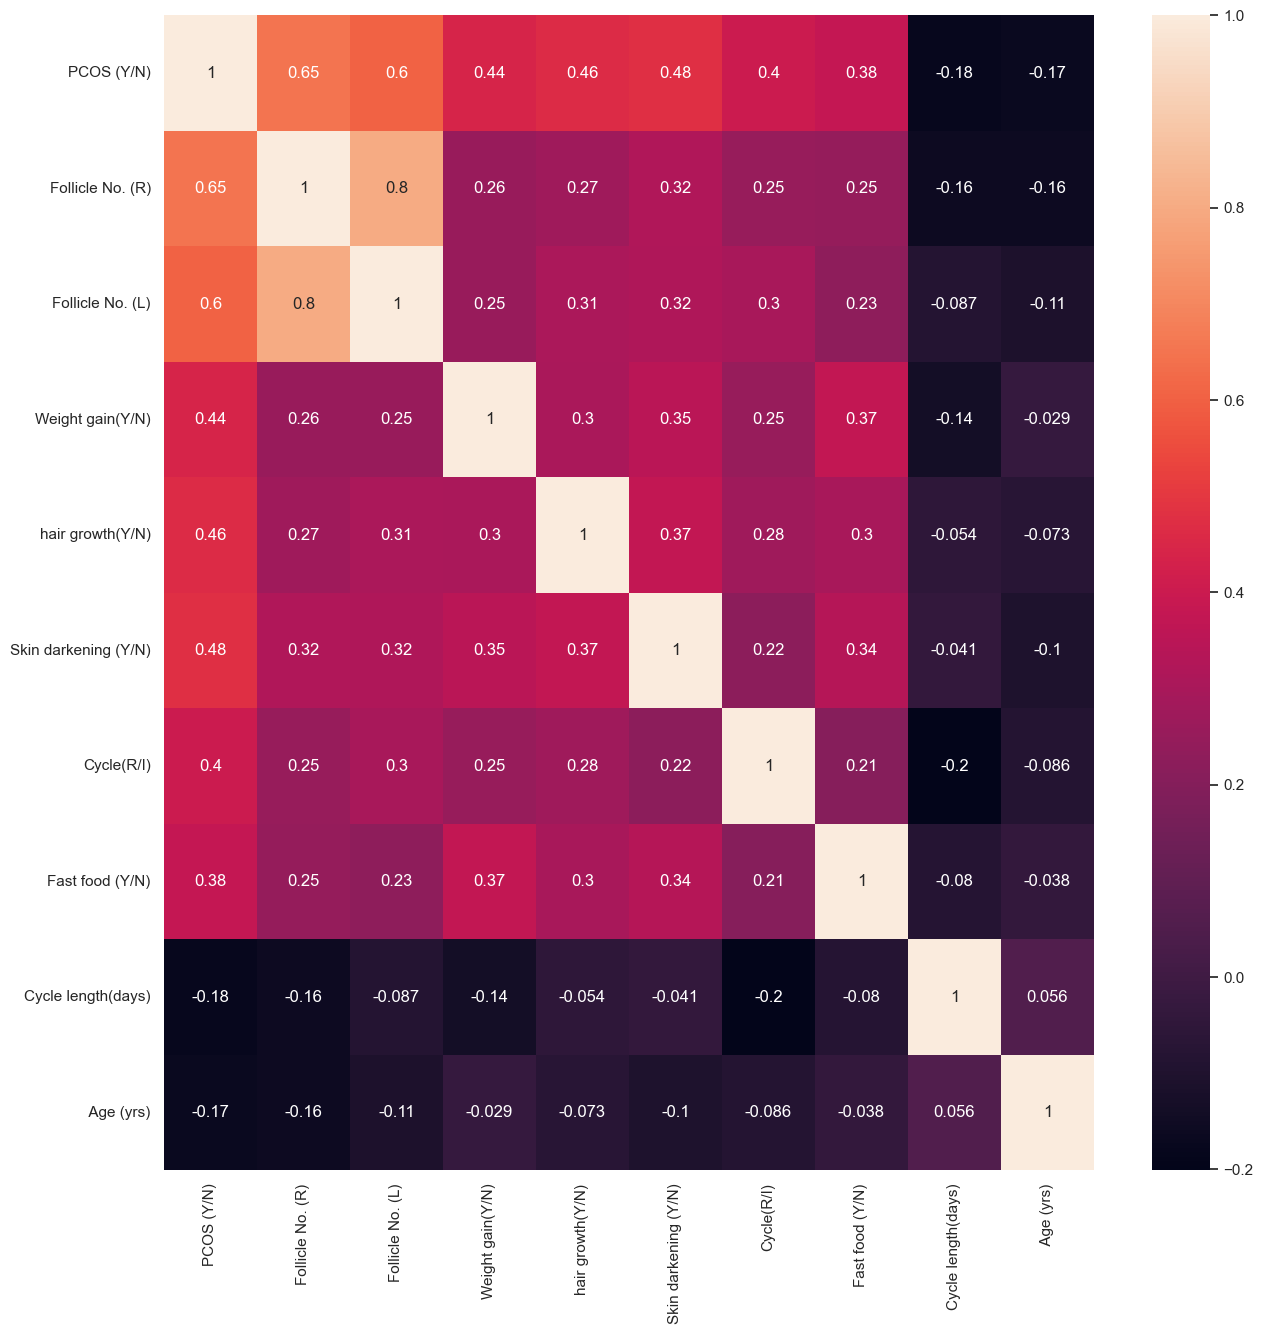

In [30]:
data = dataset[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

In [31]:


data =dataset.drop(['Unnamed: 44'], axis=1)
data['Marraige Status (Yrs)'].fillna(0,inplace = True)
data['Fast food (Y/N)'].fillna(0,inplace = True)

print(pd.isnull(data).sum())


Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [32]:
data.info()
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [33]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.513863,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500270,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


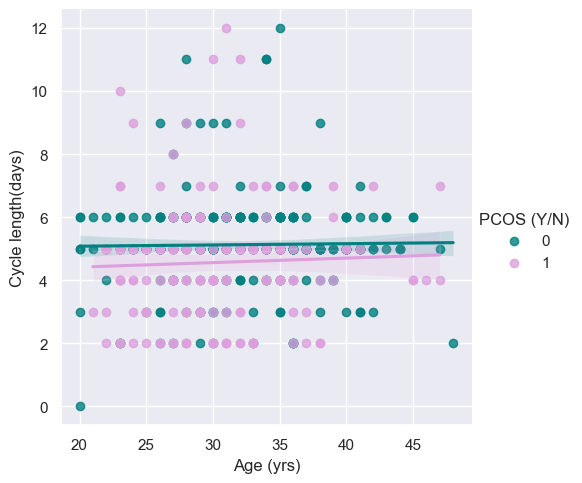

In [34]:
# Length of menstrual phase in PCOS vs normal 
import seaborn as sns
data.columns = [col.strip() for col in data.columns]
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

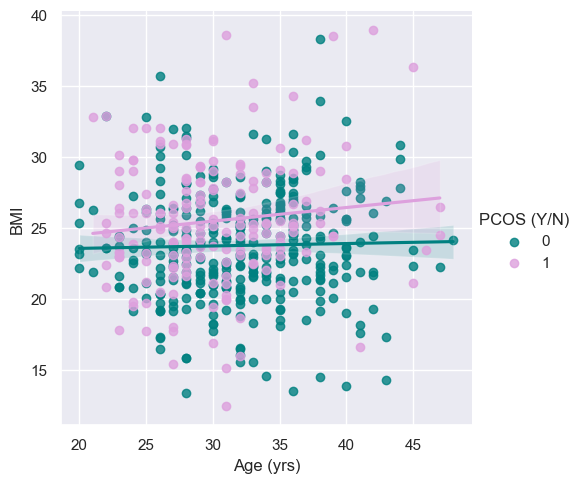

In [35]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

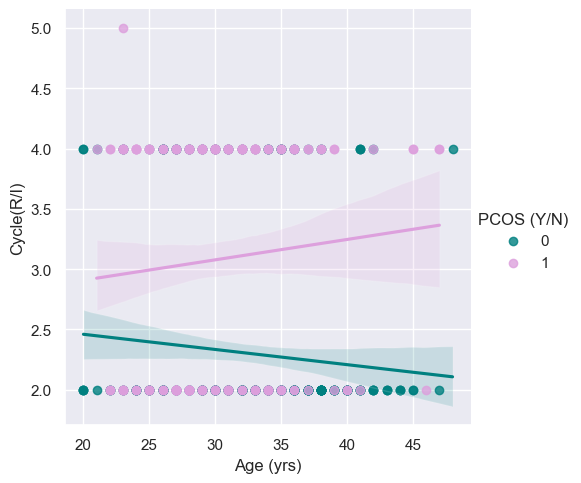

In [36]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

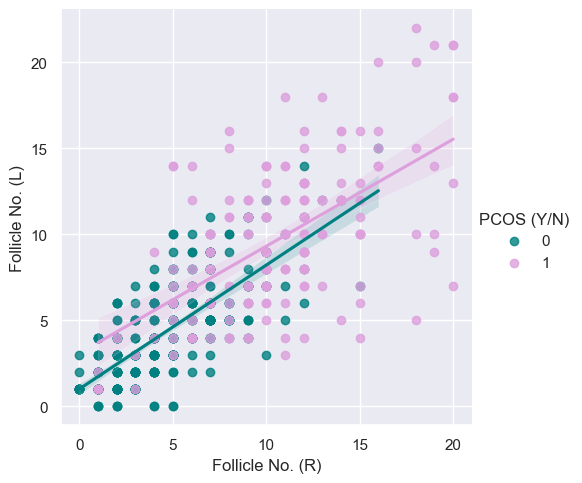

In [37]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

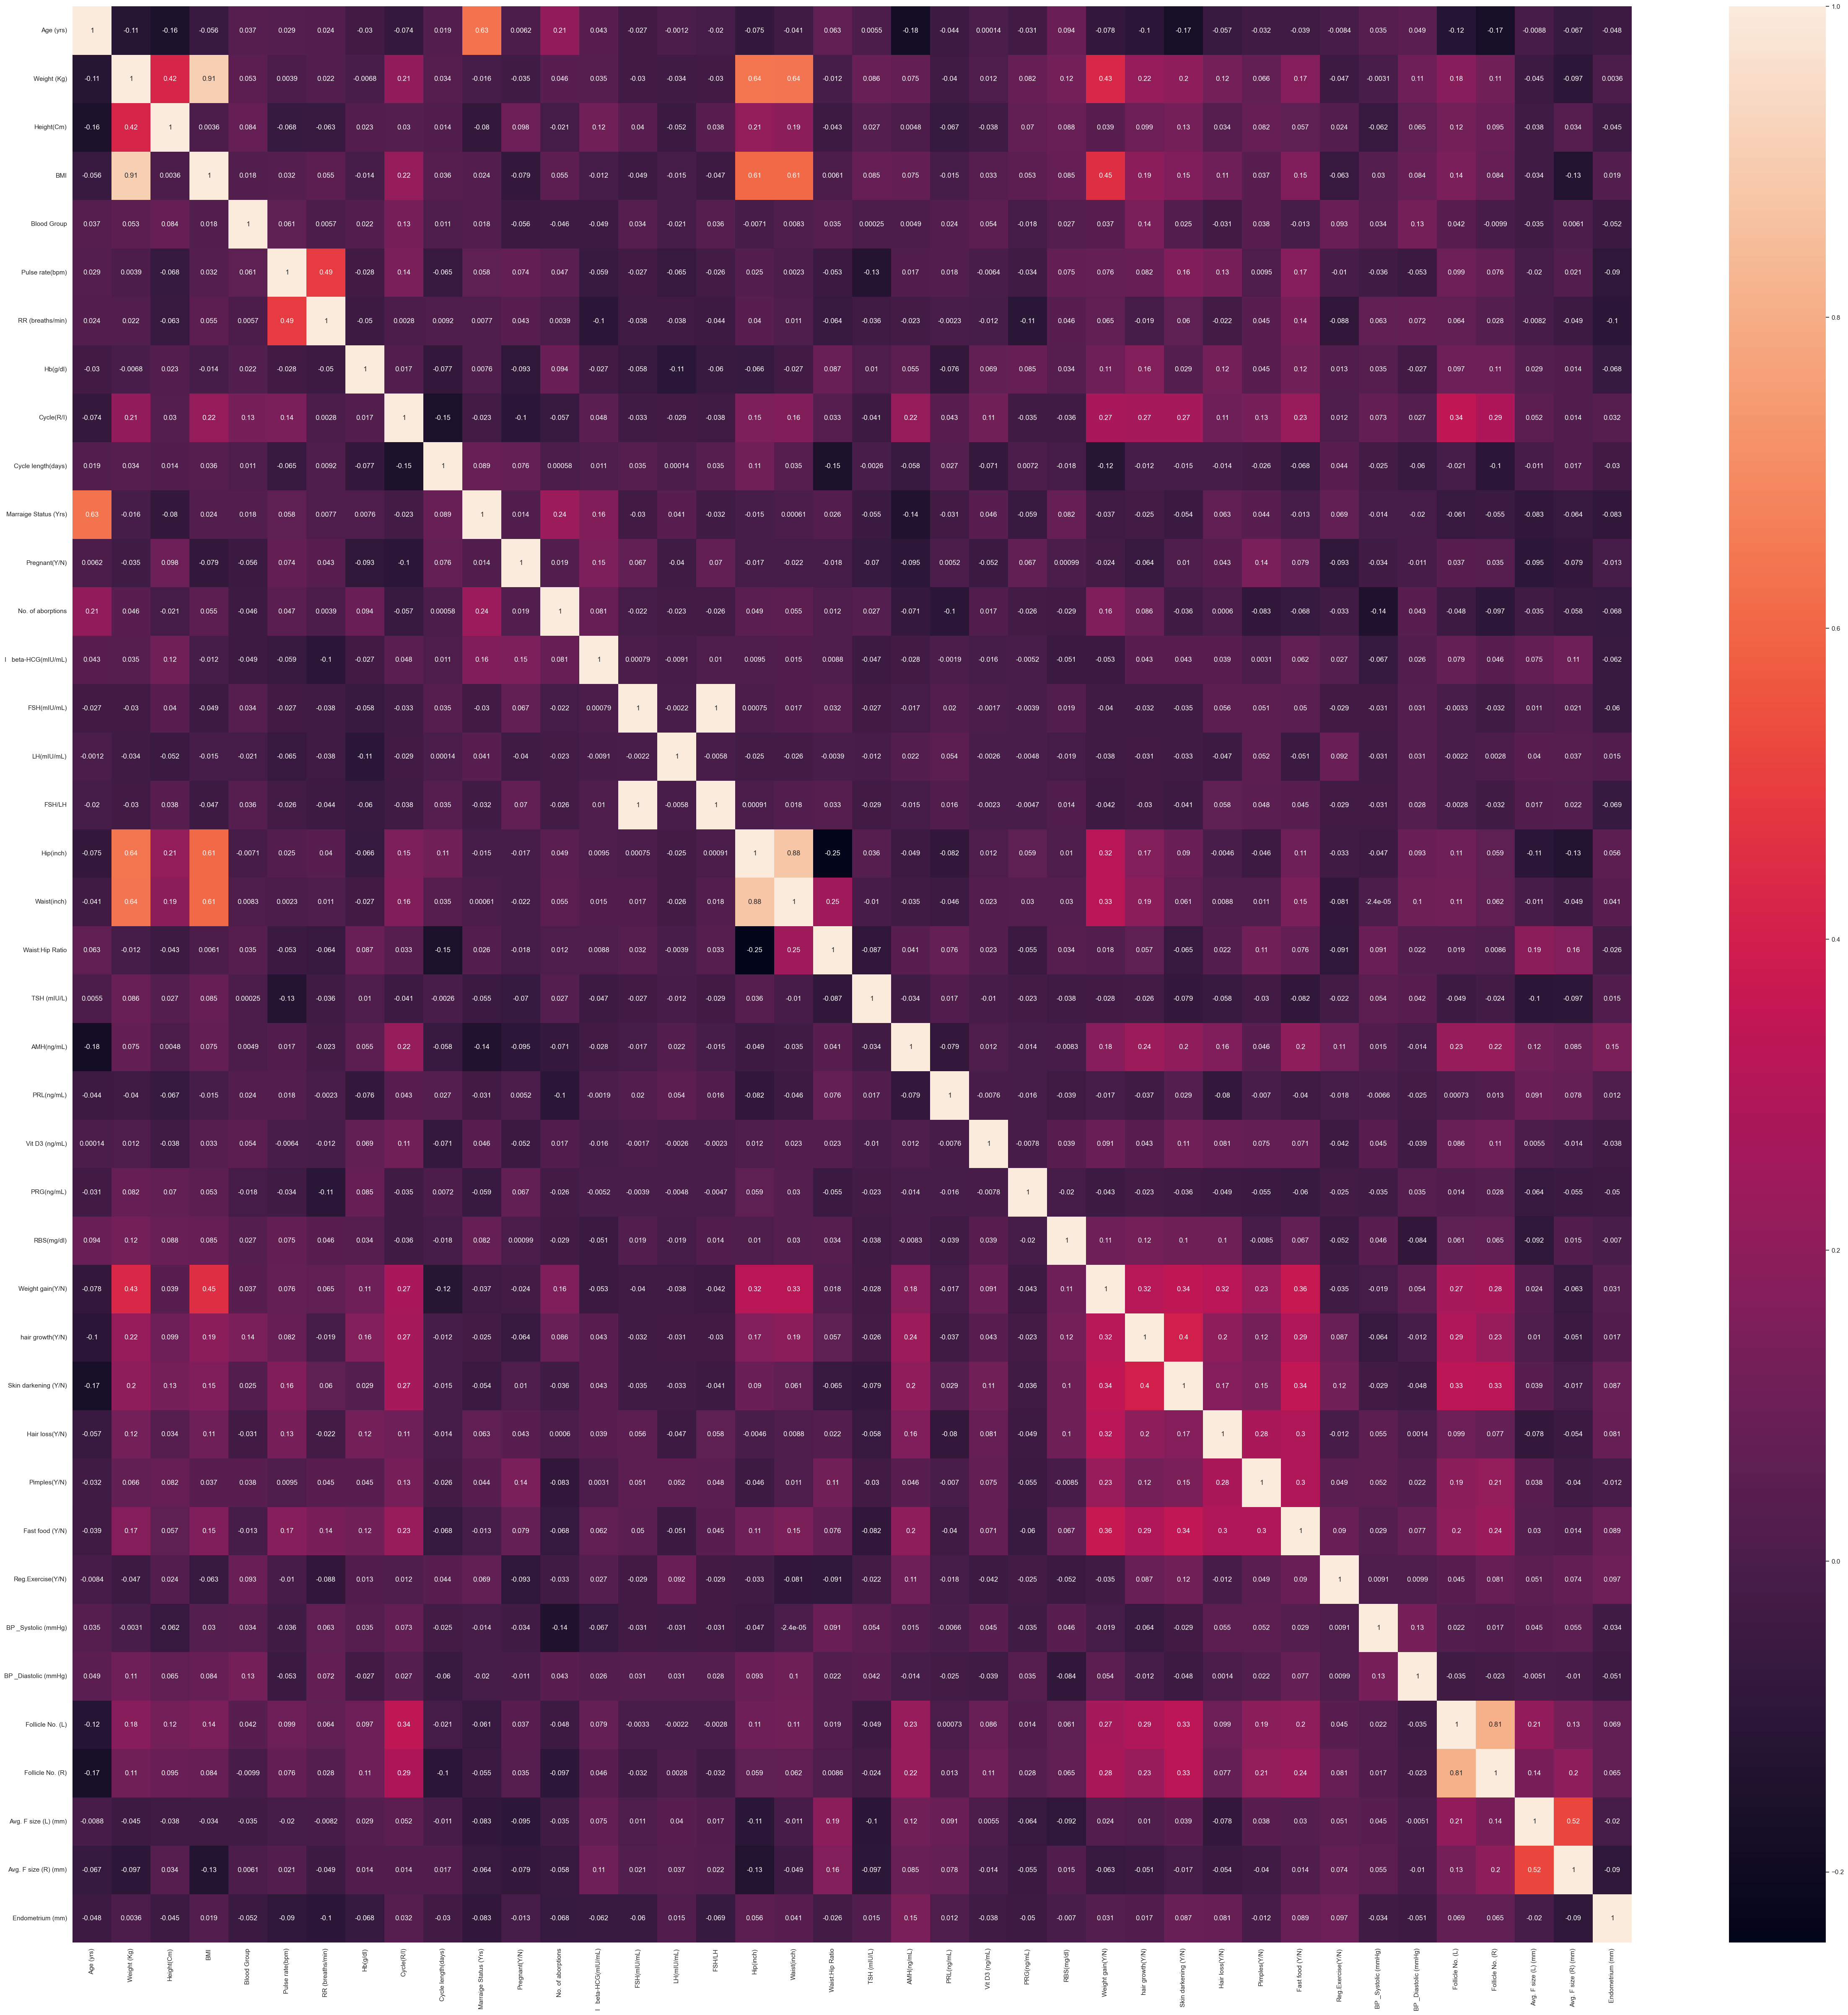

In [53]:
#heat map
import seaborn as sns

var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)
core=var_train.corr()
sns.set(rc = {'figure.figsize':(60,60)})

sns.heatmap(core,annot=True)
plt.show()

accuracy: 0.7914110429447853


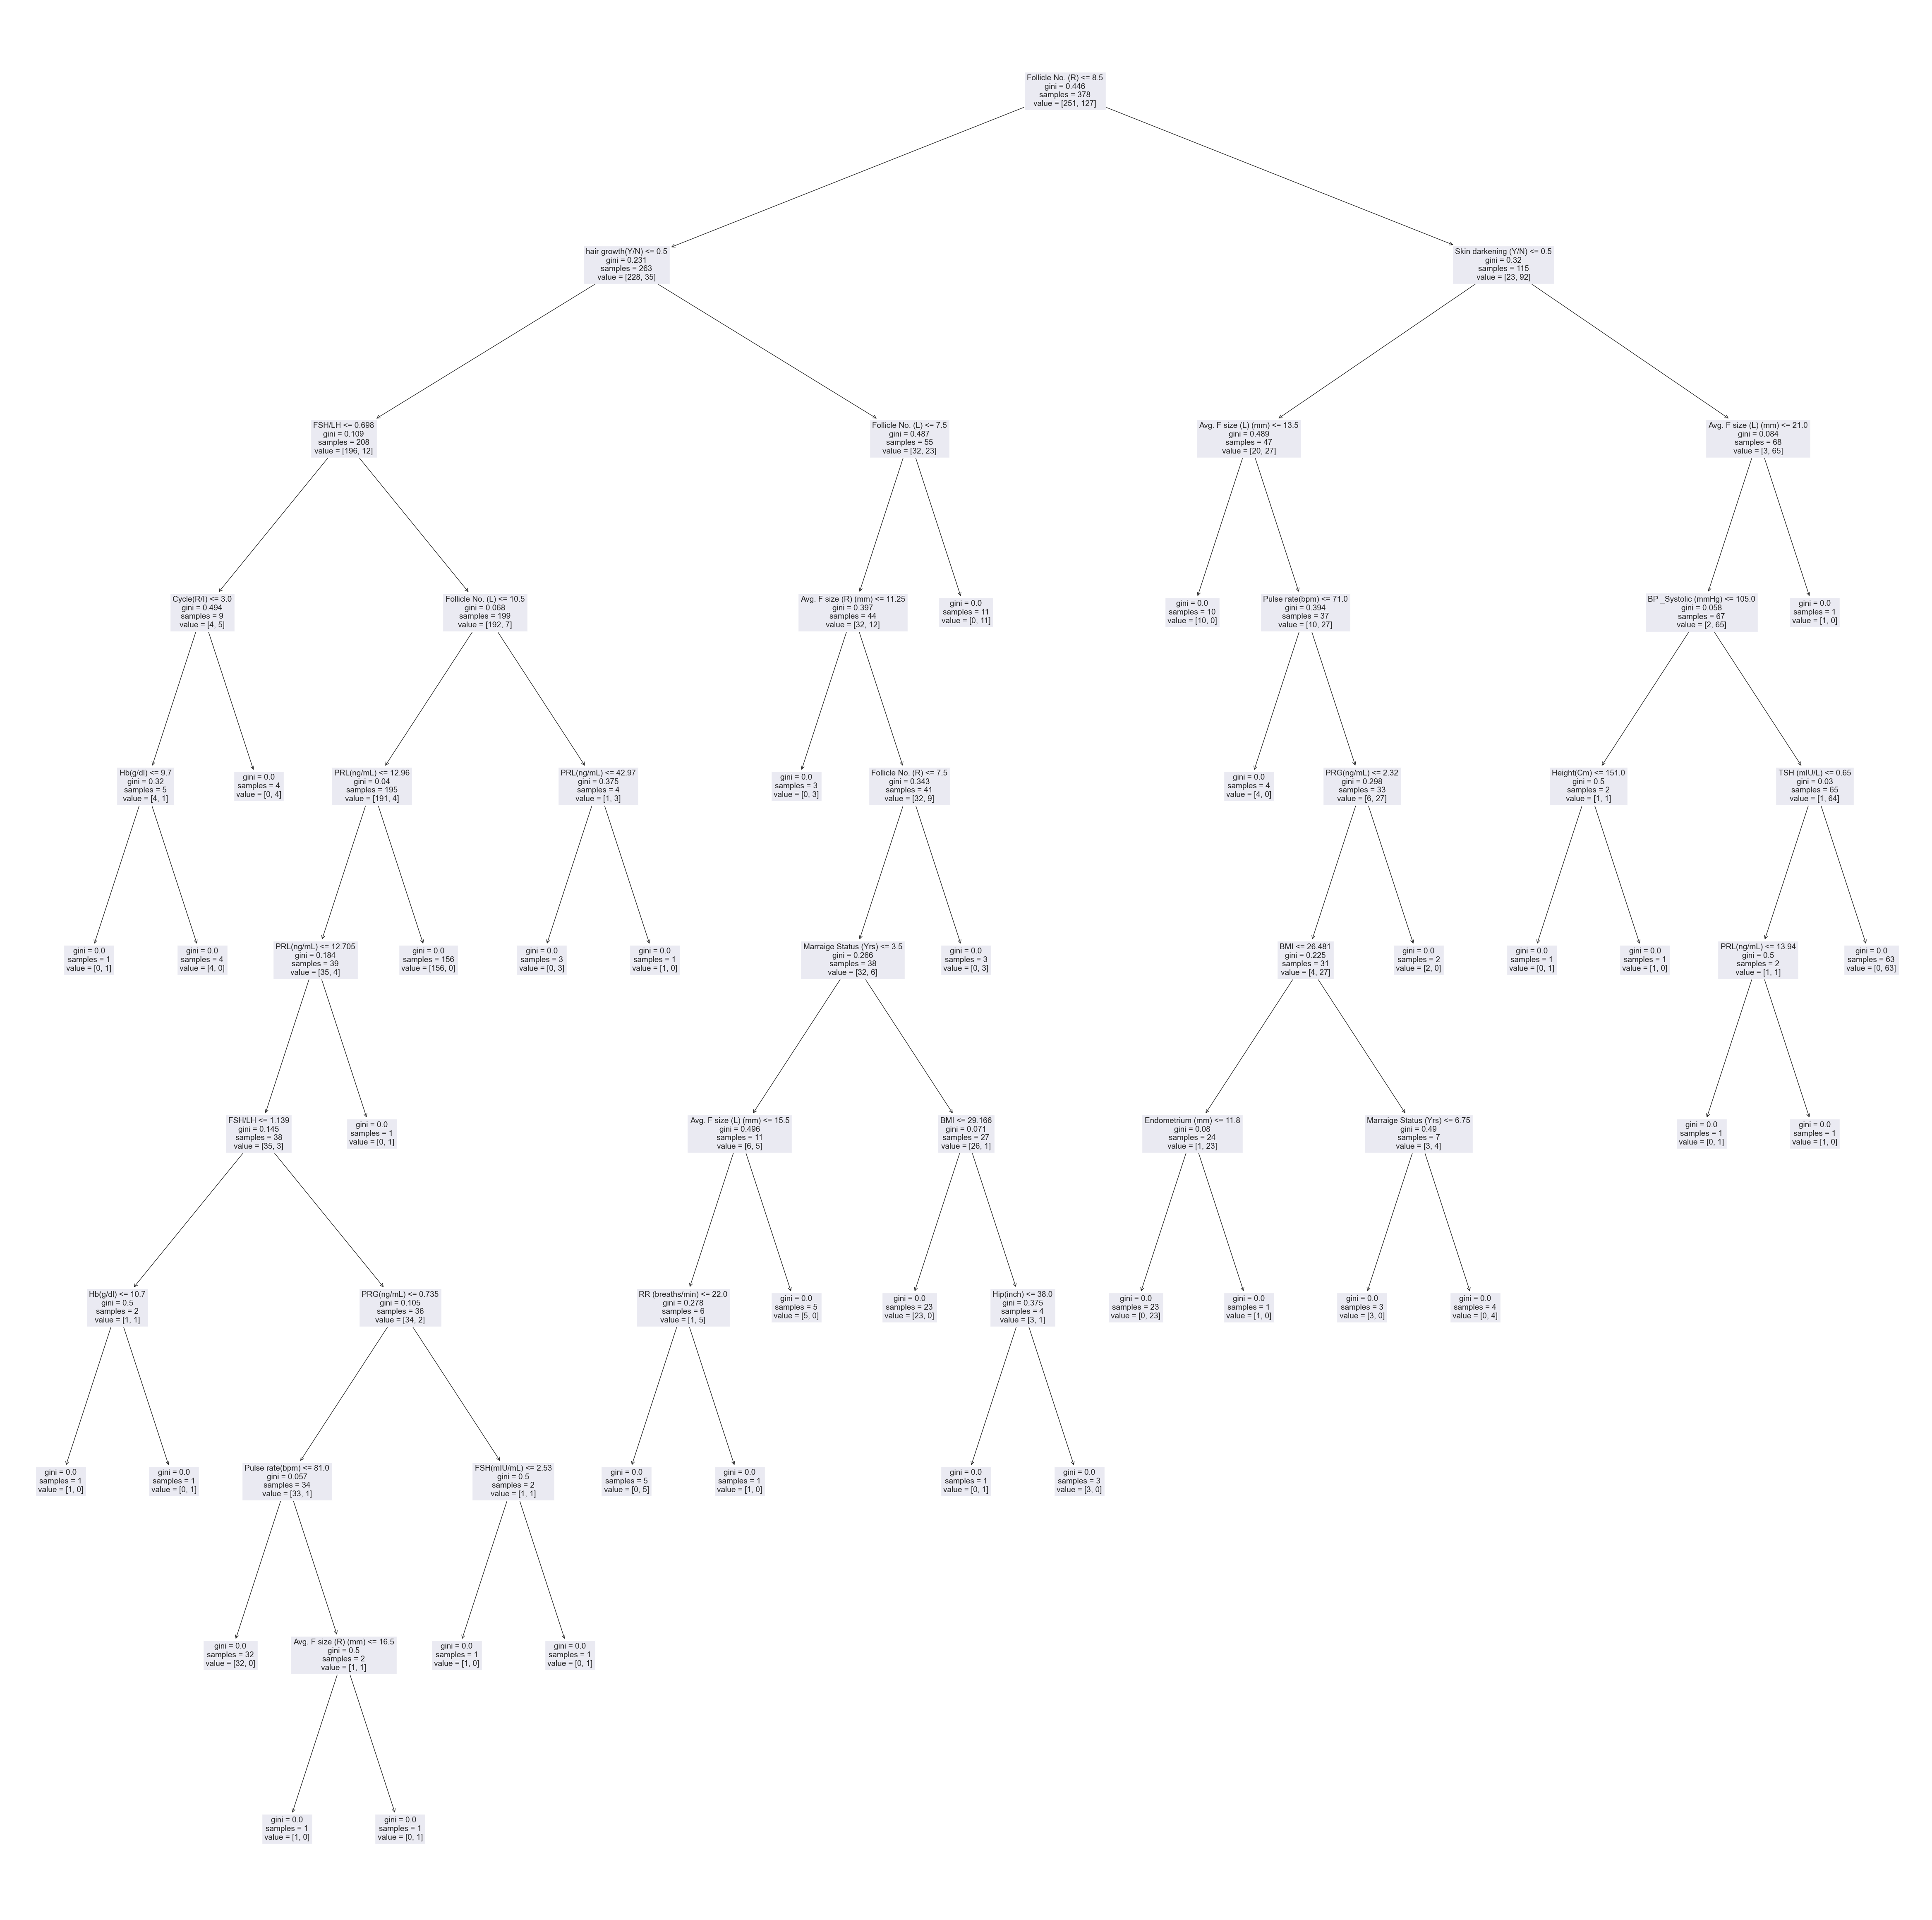

In [38]:
#decision tree
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
features=[]
pcosYN=[]
notin=["Sl. No","Patient File No.","AMH(ng/mL) ","II    beta-HCG(mIU/mL)"]
for i in data:
    if i not in notin:
        if i != "PCOS (Y/N)":
            features.append(i)
        else:
            pcosYN.append(i)
#preprocessing
# data['II    beta-HCG(mIU/mL)'].fillna(0,inplace = True)
data['AMH(ng/mL)'].fillna(0,inplace = True)


cd=0
for i in data[features]:
    for j in data[i]:
        cd+=1
        if math.isnan(j):
            print(i,":",cd)
            
               

    cd=0
var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(var_train, res_train)

tree.plot_tree(dtree, feature_names=features)
score = dtree.score(var_test, res_test)
print("accuracy:",score)


In [39]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=29)
clf.fit(var_train,res_train)

train_x,train_y=var_train,res_train
test_x,test_y=var_test,res_test
train_accuracy=clf.score(train_x,train_y)

test_accuracy=clf.score(test_x,test_y)
print("train accuracy : ",train_accuracy)
print("test accuracy : ",test_accuracy)


train accuracy :  0.9973544973544973
test accuracy :  0.8650306748466258


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
# datas=[]
# for i in range(0,540):
#     datas.append(data[features].iloc[i])
x=data[features]
y=data[pcosYN]
# predictvalue=list(data[features].iloc[540])
# print(data[pcosYN])
knn.fit(var_train,res_train)

ypred=knn.predict(var_test)


prediction = accuracy_score(ypred,res_test)
print(prediction)


0.6380368098159509


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [54]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
  
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
varRF_train, varRF_test, resRF_train, resRF_test = train_test_split(data[features],data[pcosYN], test_size = 0.2)
print(resRF_test.count())
regressor.fit(varRF_train,resRF_train)
print(regressor.score(varRF_test,resRF_test)) 

PCOS (Y/N)    109
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22300\1876371590.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(varRF_train,resRF_train)


0.6771249088374088


In [59]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
varLG_train, varLG_test, resLG_train, resLG_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)

classifier.fit(varLG_train,resLG_train)
ypred=classifier.predict(varLG_test)
print(accuracy_score(resLG_test,ypred))

0.8895705521472392


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.1)

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(var_train,res_train)
print(gb_clf.score(var_test,res_test))

0.8181818181818182


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
#cat boosting
# from catboost import CatBoostClassifier
# cat_features=[0,1,2,3,4,5,6,7,8]
# clf = CatBoostClassifier(iterations=5,learning_rate=0.1)


# clf.fit(var_train, res_train,cat_features=cat_features, eval_set=(var_test,res_test),verbose=False)
# print()

In [108]:
#xg boosting
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.2)


model = XGBClassifier()
model.fit(var_train, res_train)

y_pred = model.predict(var_test)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(res_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.91%


In [110]:
#svm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(var_train,res_train)

y_pred = svclassifier.predict(var_test)
print(accuracy_score(res_test,y_pred))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8807339449541285
